In [46]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns

# Splitting data into training and testing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# 全局设置字体及大小，设置公式字体即可，若要修改刻度字体，可在此修改全局字体
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['Times New Roman'],
    "font.size": 24,# 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
from sklearn.model_selection import KFold, cross_validate

In [47]:
# !pip install scikit-learn

In [48]:
import matplotlib

In [49]:
print(matplotlib.matplotlib_fname())

/root/miniconda/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc


In [50]:
import random
import numpy as np
import torch

# 设置Python随机数种子
random.seed(44)

# 设置Numpy随机数种子
np.random.seed(44)

# 设置PyTorch随机数种子
torch.manual_seed(44)
if torch.cuda.is_available():
    torch.cuda.manual_seed(44)


In [51]:
# # ep_feat_lst
from sklearn import metrics
def result_of_reg(y_test, predict_lgbm):
    print('可解释方差值：{}'.format(round(metrics.explained_variance_score(y_test, predict_lgbm), 2)))
    print('平均绝对误差：{}'.format(round(metrics.mean_absolute_error(y_test, predict_lgbm), 2)))
    print('均方误差：{}'.format(round(np.sqrt(metrics.mean_squared_error(y_test, predict_lgbm)), 2)))
    print('R方值：{}'.format(round(metrics.r2_score(y_test, predict_lgbm), 2)))

In [52]:
#分类模型的评估函数
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score

def result_df_cal(model, X_train, y_train, X_test, y_test, metrics=
              [accuracy_score, recall_score, precision_score, f1_score]):
    res_train = []
    res_test = []
    col_name = []
    for fun in metrics:
        res_train.append(fun( y_train,model.predict(X_train)))
        res_test.append(fun( y_test,model.predict(X_test))) 
        col_name.append(fun.__name__)
 
    res_train.append(roc_auc_score(y_train,model.predict_proba(X_train)[:, 1]))
    res_test.append(roc_auc_score(y_test,model.predict_proba(X_test)[:, 1])) 
    col_name.append(roc_auc_score.__name__)
    idx_name = ['train_eval', 'test_eval']
    res = pd.DataFrame([res_train, res_test], columns=col_name, index=idx_name)
    return res

In [53]:
#分类模型的评估函数
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score

def result_df_cal(y_test,prediction, metrics=
              [accuracy_score, recall_score, precision_score, f1_score]):
    res_train = []
    res_test = []
    col_name = []
    for fun in metrics:
        res_train.append(fun( y_train,model.predict(X_train)))
        res_test.append(fun( y_test,model.predict(X_test))) 
        col_name.append(fun.__name__)
 
    res_train.append(roc_auc_score(y_train,model.predict_proba(X_train)[:, 1]))
    res_test.append(roc_auc_score(y_test,model.predict_proba(X_test)[:, 1])) 
    col_name.append(roc_auc_score.__name__)
    idx_name = ['train_eval', 'test_eval']
    res = pd.DataFrame([res_train, res_test], columns=col_name, index=idx_name)
    return res

In [54]:
def calculate_metrics(y_true, predictions):
    """计算各项指标并返回结果字典。
    
    参数:
    y_true -- 真实标签
    predictions -- 预测标签
    
    返回:
    metrics -- 包含各项指标的字典
    """
    metrics = {
        '准确率': accuracy_score(y_true, predictions),
        '召回率': recall_score(y_true, predictions, average='weighted'),
        '精确率': precision_score(y_true, predictions, average='weighted'),
        'F1分数': f1_score(y_true, predictions, average='weighted')       
    }
    return metrics

In [55]:
def calculate_metrics_noweigh(y_true, predictions):
    """计算各项指标并返回结果字典。
    
    参数:
    y_true -- 真实标签
    predictions -- 预测标签
    
    返回:
    metrics -- 包含各项指标的字典
    """
    metrics = {
        '准确率': accuracy_score(y_true, predictions),
        '召回率': recall_score(y_true, predictions),
        '精确率': precision_score(y_true, predictions),
        'F1分数': f1_score(y_true, predictions)       
    }
    return metrics

In [56]:

tcc2 = pd.read_csv('finish.csv',encoding='gbk')
tcc2= tcc2.drop(columns=["Unnamed: 0"])
# 16513 . 284
tcc2

,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Module,Module_number_of_cells_in_module,Module_JV_data_recalculated_per_cell,Perovskite_single_crystal,Perovskite_dimension_0D,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_perovskite_inspired_structure,Perovskite_composition_inorganic,Perovskite_composition_leadfree,Perovskite_band_gap,Perovskite_band_gap_graded,Perovskite_deposition_number_of_deposition_steps,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_solvent_annealing,Add_lay_front,Add_lay_back,Encapsulation,JV_measured,JV_average_over_n_number_of_cells,JV_certified_values,JV_light_intensity,...,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,compound possible,max ionic char,avg ionic char,JV_default_PCE
0,0.20,0.0,1,0,0,0,0.0,0,0,0,0,0,1,0,1,0,1,1,1.27,0,1.0,0,0,0,0,0,1,1,0,100.0,...,82.480,55.619000,24.058400,43.015,0.0,1.062,1.062,0.637200,0.509760,1.062,0.0,0.0,0.0,0.0,0.0,0.0,64.0,229.0,165.0,112.400000,58.080000,64.0,1.800000,3.400000,8.000000,0.000000,True,0.582815,0.095366,0.00
1,0.20,0.0,1,0,0,0,0.0,0,0,0,0,0,1,0,1,0,1,1,1.39,0,1.0,0,0,0,0,0,1,1,0,100.0,...,86.285,54.806900,24.383240,43.015,0.0,1.457,1.457,0.660900,0.528720,1.062,0.0,0.0,0.0,0.0,0.0,0.0,64.0,229.0,165.0,112.400000,58.080000,64.0,1.800000,3.400000,8.000000,0.000000,True,0.691867,0.098666,0.00
2,0.20,0.0,1,0,0,0,0.0,0,0,0,0,0,1,0,1,0,1,1,1.51,0,1.0,0,0,0,0,0,1,1,0,100.0,...,86.285,51.558500,25.682600,29.480,0.0,1.457,1.457,0.755700,0.604560,1.062,0.0,0.0,0.0,0.0,0.0,0.0,64.0,229.0,165.0,112.400000,58.080000,64.0,1.800000,3.400000,8.000000,0.000000,True,0.691867,0.110265,0.13
3,0.20,0.0,1,0,0,0,0.0,0,0,0,0,0,1,0,1,0,1,1,1.63,0,1.0,0,0,0,0,0,1,1,0,100.0,...,86.285,48.310100,26.981960,29.480,0.0,1.457,1.457,0.850500,0.680400,1.457,0.0,0.0,0.0,0.0,0.0,0.0,64.0,229.0,165.0,112.400000,58.080000,64.0,1.800000,3.400000,8.000000,0.000000,True,0.691867,0.119302,0.12
4,0.20,0.0,1,0,0,0,0.0,0,0,0,0,0,1,0,1,0,1,1,1.75,0,1.0,0,0,0,0,0,1,1,0,100.0,...,86.285,47.498000,27.306800,29.480,0.0,1.457,1.457,0.874200,0.699360,1.457,0.0,0.0,0.0,0.0,0.0,0.0,64.0,229.0,165.0,112.400000,58.080000,64.0,1.800000,3.400000,8.000000,0.000000,True,0.691867,0.121160,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16508,0.16,0.0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,1,1,1.86,0,0.0,1,0,0,0,0,1,1,0,100.0,...,26.685,35.022574,9.935447,43.015,0.0,2.202,2.202,0.665609,0.500458,1.062,0.0,0.0,0.0,0.0,0.0,0.0,12.0,225.0,213.0,97.849624,63.734524,64.0,1.749373,3.493734,9.974937,1.754386,True,0.124732,0.027164,3.71
16509,0.16,0.0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,1,1,1.84,0,0.0,1,0,0,0,0,1,1,0,100.0,...,26.685,34.990929,9.947029,43.015,0.0,2.202,2.202,0.666542,0.501788,1.062,0.0,0.0,0.0,0.0,0.0,0.0,12.0,225.0,213.0,97.899624,63.789398,64.0,1.749059,3.490590,9.962359,1.756587,True,0.124732,0.027168,3.73
16510,0.16,0.0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,1,1,1,1.82,0,0.0,1,0,0,0,0,1,1,0,10

In [57]:
Y=tcc2["JV_default_PCE"]
# tcc2 = tcc2.drop(columns=["Unnamed: 0"])
    

In [58]:
Y

0        0.00
1        0.00
2        0.13
3        0.12
4        0.10
         ... 
16508    3.71
16509    3.73
16510    3.83
16511    3.68
16512    3.30
Name: JV_default_PCE, Length: 16513, dtype: float64

In [59]:
Y=tcc2["JV_default_PCE"]

In [60]:
# kde: 控制是否显示核密度估计图,默认为True
# sns.distplot(Y,kde=True)
# plt.show()
Y_class = (Y >= 17).astype(int)


In [61]:
tcc = tcc2

In [62]:
tcc = tcc.drop(columns=["JV_default_Voc_scan_direction"])
tcc = tcc.drop(columns=["JV_default_Jsc_scan_direction"])
tcc = tcc.drop(columns=["JV_default_FF_scan_direction"])
tcc = tcc.drop(columns=["JV_default_PCE_scan_direction"])
tcc = tcc.drop(columns=["JV_measured"])
tcc = tcc.drop(columns=["EQE_measured"])
tcc = tcc.drop(columns=["Stability_light_UV_filter"])
tcc = tcc.drop(columns=["Stability_periodic_JV_measurements"])
tcc = tcc.drop(columns=["Stability_PCE_burn_in_observed"])
tcc = tcc.drop(columns=["Stability_flexible_cell_number_of_bending_cycles"])
tcc = tcc.drop(columns=["Outdoor_tested"])
tcc = tcc.drop(columns=["Outdoor_average_over_n_number_of_cells"])
tcc = tcc.drop(columns=["Outdoor_periodic_JV_measurements"])
tcc = tcc.drop(columns=["Outdoor_PCE_burn_in_observed"])



tcc = tcc.drop(columns=["Outdoor_detaild_weather_data_available"])
tcc = tcc.drop(columns=["Outdoor_spectral_data_available"])
tcc = tcc.drop(columns=["Outdoor_irradiance_measured"])



In [63]:
tcc = tcc.drop(columns=["JV_default_PCE"])
tcc = tcc.drop(columns=["JV_certified_values"])
tcc = tcc.drop(columns=["JV_average_over_n_number_of_cells"])
tcc = tcc.drop(columns=["Stability_measured"])

tcc = tcc.drop(columns=["Encapsulation"])
tcc = tcc.drop(columns=["Stability_average_over_n_number_of_cells"])

tcc = tcc.drop(columns=["Module"])
tcc = tcc.drop(columns=["Module_number_of_cells_in_module"])
tcc = tcc.drop(columns=["Module_JV_data_recalculated_per_cell"])




In [64]:
tcc

,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Perovskite_single_crystal,Perovskite_dimension_0D,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_perovskite_inspired_structure,Perovskite_composition_inorganic,Perovskite_composition_leadfree,Perovskite_band_gap,Perovskite_band_gap_graded,Perovskite_deposition_number_of_deposition_steps,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_solvent_annealing,Add_lay_front,Add_lay_back,JV_light_intensity,JV_light_spectra,JV_light_masked_cell,Stabilised_performance_measured,ETL_thickness_zong,Perovskite_dimension_list_zong,a_ionsMendeleevNumber,a_ionsAtomicWeight,...,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,compound possible,max ionic char,avg ionic char
0,0.20,0.0,1,0,0,0,0,0,0,1,0,1,0,1,1,1.27,0,1.0,0,0,0,0,100.0,0,0,0,65.0,3.0,5.0,132.905452,...,115.765,82.480,55.619000,24.058400,43.015,0.0,1.062,1.062,0.637200,0.509760,1.062,0.0,0.0,0.0,0.0,0.0,0.0,64.0,229.0,165.0,112.400000,58.080000,64.0,1.800000,3.400000,8.000000,0.000000,True,0.582815,0.095366
1,0.20,0.0,1,0,0,0,0,0,0,1,0,1,0,1,1,1.39,0,1.0,0,0,0,0,100.0,0,0,0,65.0,3.0,5.0,132.905452,...,115.765,86.285,54.806900,24.383240,43.015,0.0,1.457,1.457,0.660900,0.528720,1.062,0.0,0.0,0.0,0.0,0.0,0.0,64.0,229.0,165.0,112.400000,58.080000,64.0,1.800000,3.400000,8.000000,0.000000,True,0.691867,0.098666
2,0.20,0.0,1,0,0,0,0,0,0,1,0,1,0,1,1,1.51,0,1.0,0,0,0,0,100.0,0,0,0,65.0,3.0,5.0,132.905452,...,115.765,86.285,51.558500,25.682600,29.480,0.0,1.457,1.457,0.755700,0.604560,1.062,0.0,0.0,0.0,0.0,0.0,0.0,64.0,229.0,165.0,112.400000,58.080000,64.0,1.800000,3.400000,8.000000,0.000000,True,0.691867,0.110265
3,0.20,0.0,1,0,0,0,0,0,0,1,0,1,0,1,1,1.63,0,1.0,0,0,0,0,100.0,0,0,0,65.0,3.0,5.0,132.905452,...,115.765,86.285,48.310100,26.981960,29.480,0.0,1.457,1.457,0.850500,0.680400,1.457,0.0,0.0,0.0,0.0,0.0,0.0,64.0,229.0,165.0,112.400000,58.080000,64.0,1.800000,3.400000,8.000000,0.000000,True,0.691867,0.119302
4,0.20,0.0,1,0,0,0,0,0,0,1,0,1,0,1,1,1.75,0,1.0,0,0,0,0,100.0,0,0,0,65.0,3.0,5.0,132.905452,...,115.765,86.285,47.498000,27.306800,29.480,0.0,1.457,1.457,0.874200,0.699360,1.457,0.0,0.0,0.0,0.0,0.0,0.0,64.0,229.0,165.0,112.400000,58.080000,64.0,1.800000,3.400000,8.000000,0.000000,True,0.691867,0.121160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16508,0.16,0.0,1,0,0,0,0,0,0,0,0,0,1,1,1,1.86,0,0.0,1,0,0,0,100.0,0,1,0,160.0,3.0,130.0,215.736400,...,43.015,26.685,35.022574,9.935447,43.015,0.0,2.202,2.202,0.665609,0.500458,1.062,0.0,0.0,0.0,0.0,0.0,0.0,12.0,225.0,213.0,97.849624,63.734524,64.0,1.749373,3.493734,9.974937,1.754386,True,0.124732,0.027164
16509,0.16,0.0,1,0,0,0,0,0,0,0,0,0,1,1,1,1.84,0,0.0,1,0,0,0,100.0,0,1,0,160.0,3.0,130.0,215.736400,...,43.015,26.685,34.990929,9.947029,43.015,0.0,2.202,2.202,0.666542,0.501788,1.062,0.0,0.0,0.0,0.0,0.0,0.0,12.0,225.0,213.0,97.899624,63.789398

In [65]:
from sklearn.model_selection import train_test_split


# 使用train_test_split函数进行分层采样划分
X_train_fen, X_test_fen, y_train_fen, y_test_fen = train_test_split(tcc, Y_class, test_size=0.2, stratify=Y_class, random_state=7)

# 打印训练集和测试集的类别分布
print("训练集类别分布:")
print(y_train_fen.value_counts())
print("测试集类别分布:")
print(y_test_fen.value_counts())

训练集类别分布:
0    10628
1     2582
Name: JV_default_PCE, dtype: int64
测试集类别分布:
0    2657
1     646
Name: JV_default_PCE, dtype: int64


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

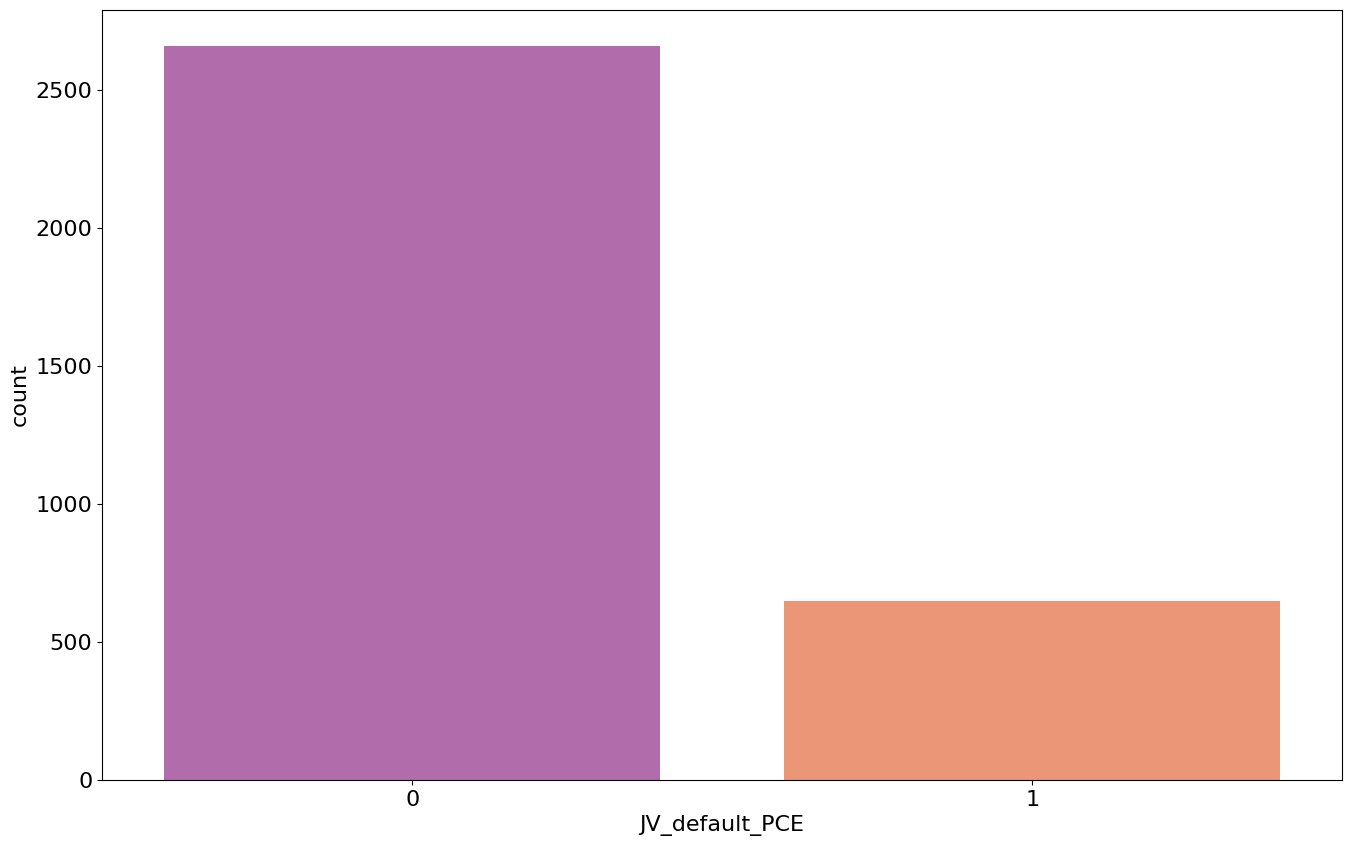

In [66]:
# sns.palplot(sns.color_palette("Blues"))

color1 = ["#bc62b5", "#fe8e64"]
sns.countplot(x=y_test_fen, palette=color1)

plt.show()

In [67]:

#1.相关性筛选
corr_matrix = pd.concat([X_train_fen,y_train_fen],axis=1).corr(method='pearson')


In [68]:
high_corr = np.where(corr_matrix.abs() >= 0.8)
for row, col in zip(high_corr[0], high_corr[1]):
    if row != col:
        print(f"{corr_matrix.index[row]} and {corr_matrix.columns[col]} have correlation {corr_matrix.iloc[row, col]:.2f}")


Perovskite_dimension_0D and Perovskite_dimension_list_zong have correlation -0.87
Perovskite_composition_inorganic and MagpieData minimum Number have correlation 0.96
Perovskite_composition_inorganic and MagpieData range Number have correlation -0.85
Perovskite_composition_inorganic and MagpieData mode Number have correlation 0.97
Perovskite_composition_inorganic and MagpieData mean MendeleevNumber have correlation -0.93
Perovskite_composition_inorganic and MagpieData avg_dev MendeleevNumber have correlation 0.91
Perovskite_composition_inorganic and MagpieData mode MendeleevNumber have correlation 0.96
Perovskite_composition_inorganic and MagpieData minimum AtomicWeight have correlation 0.96
Perovskite_composition_inorganic and MagpieData range AtomicWeight have correlation -0.82
Perovskite_composition_inorganic and MagpieData mode AtomicWeight have correlation 0.97
Perovskite_composition_inorganic and MagpieData minimum MeltingT have correlation 0.98
Perovskite_composition_inorganic a

In [69]:
for row, col in zip(high_corr[0], high_corr[1]):
    if row != col:
   
        if col < row:
           
            feature1 = corr_matrix.index[row]
            feature2 = corr_matrix.columns[col]
#             if feature1 not in tcc.columns or feature2 not in tcc.columns:
            if feature1 not in X_train_fen.columns:          
                continue
#             tcc = tcc.drop(columns=[feature1, feature2])
            X_train_fen = X_train_fen.drop(columns=[feature1])
            print(row,col)

27 6
31 28
32 29
33 29
34 28
35 28
36 31
39 28
40 29
41 28
44 28
45 29
46 28
48 29
49 30
50 30
51 30
52 30
53 30
54 30
55 30
56 30
57 30
58 30
59 30
60 30
62 30
65 30
66 30
69 30
70 30
71 30
72 30
73 30
74 30
75 30
76 30
77 30
78 30
79 30
81 30
83 30
86 30
87 30
88 30
90 30
94 91
95 92
96 92
98 97
99 91
100 92
102 92
103 97
104 92
106 64
107 92
108 92
109 92
111 94
113 93
114 93
115 93
116 93
117 93
118 13
119 14
120 13
121 97
122 93
123 13
126 124
127 13
128 13
129 13
130 13
131 14
132 13
133 97
134 93
135 13
136 13
137 13
138 13
139 93
140 93
141 13
142 37
143 82
144 37
145 94
146 93
147 13
148 13
149 119
150 13
151 97
152 93
153 13
154 13
155 124
156 124
157 97
158 93
159 13
160 124
162 124
163 93
164 97
165 13
169 94
170 93
171 13
173 82
174 82
175 94
176 93
177 13
179 63
180 178
181 97
182 93
183 13
185 14
186 14
187 101
188 101
190 37
191 14
192 14
193 94
194 93
195 13
199 94
200 93
201 13
204 203
205 93
206 93
207 13
209 110
210 110
211 63
212 63
215 64
216 64
217 64
218 64
222 

In [70]:
chongfulist = []
for i in X_train_fen.columns:
    if X_train_fen[i].nunique() ==1 :
        chongfulist.append(i)

In [71]:
X_train_fen = X_train_fen.drop(columns=chongfulist,axis=1)

In [72]:

#1.斯皮尔曼筛选
corr_matrix = pd.concat([X_train_fen,y_train_fen],axis=1).corr(method='spearman')


In [73]:
high_corr = np.where(corr_matrix.abs() >= 0.8)
for row, col in zip(high_corr[0], high_corr[1]):
    if row != col:
        print(f"{corr_matrix.index[row]} and {corr_matrix.columns[col]} have correlation {corr_matrix.iloc[row, col]:.2f}")


Perovskite_composition_inorganic and MagpieData maximum Electronegativity have correlation -0.87
a_ionsAtomicWeight and a_ionsMeltingT have correlation -0.81
a_ionsAtomicWeight and long_formMeltingT have correlation -0.84
a_ionsMeltingT and a_ionsAtomicWeight have correlation -0.81
a_ionsNdValence and MagpieData maximum NpUnfilled have correlation -0.82
b_ionsNdUnfilled and b_ionsGSmagmom have correlation 1.00
b_ionsNdUnfilled and long_formNdUnfilled have correlation 1.00
b_ionsNdUnfilled and long_formGSmagmom have correlation 1.00
b_ionsNdUnfilled and MagpieData maximum GSmagmom have correlation 1.00
b_ionsGSmagmom and b_ionsNdUnfilled have correlation 1.00
b_ionsGSmagmom and long_formNdUnfilled have correlation 1.00
b_ionsGSmagmom and long_formGSmagmom have correlation 1.00
b_ionsGSmagmom and MagpieData maximum GSmagmom have correlation 1.00
long_formMeltingT and a_ionsAtomicWeight have correlation -0.84
long_formNfValence and 0-norm have correlation -0.83
long_formNdUnfilled and b_i

In [74]:
for row, col in zip(high_corr[0], high_corr[1]):
    if row != col:
   
        if col < row:
           
            feature1 = corr_matrix.index[row]
            feature2 = corr_matrix.columns[col]
#             if feature1 not in tcc.columns or feature2 not in tcc.columns:
            if feature1 not in X_train_fen.columns:          
                continue
#             tcc = tcc.drop(columns=[feature1, feature2])
            X_train_fen = X_train_fen.drop(columns=[feature1])
            print(row,col)

29 28
35 32
39 28
42 32
43 32
44 41
47 13
49 30
51 49
52 32


In [75]:
chongfulist = []
for i in X_train_fen.columns:
    if X_train_fen[i].nunique() ==1 :
        chongfulist.append(i)

In [76]:
X_train_fen = X_train_fen.drop(columns=chongfulist,axis=1)

In [77]:
X_train_fen

,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Perovskite_single_crystal,Perovskite_dimension_0D,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_perovskite_inspired_structure,Perovskite_composition_inorganic,Perovskite_composition_leadfree,Perovskite_band_gap,Perovskite_band_gap_graded,Perovskite_deposition_number_of_deposition_steps,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_solvent_annealing,Add_lay_front,Add_lay_back,JV_light_intensity,JV_light_spectra,JV_light_masked_cell,Stabilised_performance_measured,ETL_thickness_zong,a_ionsMendeleevNumber,a_ionsAtomicWeight,a_ionsNdValence,b_ionsNsUnfilled,b_ionsNdUnfilled,b_ionsNfUnfilled,b_ionsGSbandgap,c_ionsNsUnfilled,long_formMendeleevNumber,long_formAtomicWeight,long_formElectronegativity,long_formNfValence,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum NdValence,MagpieData minimum NUnfilled,MagpieData minimum SpaceGroupNumber
2085,0.120,0.0,2,0,0,0,0,0,0,1,0,1,0,0,0,1.600000,0,1.0,1,0,0,0,100.0,0,0,0,50.0,88.87500,4.008130,0.0,0.000,0.0,0.0,0.0,0.0,82.666667,37.932059,2.756667,1.166667,77.0,96.0,0.0,1.0,64.0
13755,0.090,0.0,1,0,0,0,0,0,0,1,0,1,0,0,0,1.600000,0,1.0,0,0,0,0,100.0,0,0,0,200.0,92.29875,16.450057,0.0,0.000,0.0,0.0,0.0,0.0,94.220968,77.559342,2.911719,0.150538,77.0,96.0,0.0,1.0,64.0
15279,0.100,0.0,2,0,0,0,0,0,0,1,0,1,0,0,0,1.670000,0,1.0,1,0,0,0,100.0,0,0,0,50.0,88.87500,4.008130,0.0,0.000,0.0,0.0,0.0,0.0,89.333333,70.947242,2.733000,1.166667,77.0,96.0,0.0,1.0,64.0
10774,0.125,0.0,1,0,0,0,0,0,0,1,0,1,0,0,0,1.622000,0,1.0,1,0,0,0,100.0,0,0,0,40.0,78.04000,38.362601,0.0,0.000,0.0,0.0,0.0,0.0,80.997069,18.017973,2.938264,0.041034,5.0,96.0,0.0,1.0,64.0
14677,0.160,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,1.730000,0,1.0,1,0,0,0,100.0,0,0,0,80.0,661.00000,13219.587262,0.0,0.000,0.0,0.0,0.0,0.0,70.392453,74.819712,2.666962,2.615094,5.0,96.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689,0.100,0.0,1,0,0,0,0,0,0,1,0,1,0,0,0,1.799375,0,1.0,1,0,0,0,100.0,0,0,0,30.0,92.38125,16.749862,0.0,0.000,0.0,0.0,0.0,0.0,94.217742,77.558054,2.911403,0.150538,77.0,96.0,0.0,1.0,64.0
8740,1.000,0.0,1,0,1,0,0,0,0,1,0,1,0,0,0,1.600000,0,2.0,0,0,0,0,100.0,0,0,0,260.0,88.87500,4.008130,0.0,0.000,0.0,0.0,0.0,0.0,82.666667,37.932059,2.756667,1.166667,77.0,96.0,0.0,1.0,64.0
16200,0.067,4.0,1,0,0,0,0,0,0,1,0,1,0,0,0,2.300000,0,0.0,1,0,0,0,100.0,0,1,1,300.0,88.87500,4.008130,0.0,0.005,0.0,0.0,0.0,0.0,87.506667,53.568967,2.796833,0.005833,65.0,95.0,0.0,1.0,64.0
6467,0.060,0.0,1,0,0,0,0,0,0,1,0,1,0,0,0,1.600000,0,1.0,0,0,0,0,100.0,0,0,0,70.0,88.87500,4.008130,0.0,0.000,0.0,0.0,0.0,0.0,82.666667,37.932059,2.756667,1.166667,77.0,96.0,0.0,1.0,64.0


In [78]:
import seaborn as sns

In [79]:
X_train_fen

,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Perovskite_single_crystal,Perovskite_dimension_0D,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_perovskite_inspired_structure,Perovskite_composition_inorganic,Perovskite_composition_leadfree,Perovskite_band_gap,Perovskite_band_gap_graded,Perovskite_deposition_number_of_deposition_steps,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_solvent_annealing,Add_lay_front,Add_lay_back,JV_light_intensity,JV_light_spectra,JV_light_masked_cell,Stabilised_performance_measured,ETL_thickness_zong,a_ionsMendeleevNumber,a_ionsAtomicWeight,a_ionsNdValence,b_ionsNsUnfilled,b_ionsNdUnfilled,b_ionsNfUnfilled,b_ionsGSbandgap,c_ionsNsUnfilled,long_formMendeleevNumber,long_formAtomicWeight,long_formElectronegativity,long_formNfValence,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum NdValence,MagpieData minimum NUnfilled,MagpieData minimum SpaceGroupNumber
2085,0.120,0.0,2,0,0,0,0,0,0,1,0,1,0,0,0,1.600000,0,1.0,1,0,0,0,100.0,0,0,0,50.0,88.87500,4.008130,0.0,0.000,0.0,0.0,0.0,0.0,82.666667,37.932059,2.756667,1.166667,77.0,96.0,0.0,1.0,64.0
13755,0.090,0.0,1,0,0,0,0,0,0,1,0,1,0,0,0,1.600000,0,1.0,0,0,0,0,100.0,0,0,0,200.0,92.29875,16.450057,0.0,0.000,0.0,0.0,0.0,0.0,94.220968,77.559342,2.911719,0.150538,77.0,96.0,0.0,1.0,64.0
15279,0.100,0.0,2,0,0,0,0,0,0,1,0,1,0,0,0,1.670000,0,1.0,1,0,0,0,100.0,0,0,0,50.0,88.87500,4.008130,0.0,0.000,0.0,0.0,0.0,0.0,89.333333,70.947242,2.733000,1.166667,77.0,96.0,0.0,1.0,64.0
10774,0.125,0.0,1,0,0,0,0,0,0,1,0,1,0,0,0,1.622000,0,1.0,1,0,0,0,100.0,0,0,0,40.0,78.04000,38.362601,0.0,0.000,0.0,0.0,0.0,0.0,80.997069,18.017973,2.938264,0.041034,5.0,96.0,0.0,1.0,64.0
14677,0.160,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,1.730000,0,1.0,1,0,0,0,100.0,0,0,0,80.0,661.00000,13219.587262,0.0,0.000,0.0,0.0,0.0,0.0,70.392453,74.819712,2.666962,2.615094,5.0,96.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689,0.100,0.0,1,0,0,0,0,0,0,1,0,1,0,0,0,1.799375,0,1.0,1,0,0,0,100.0,0,0,0,30.0,92.38125,16.749862,0.0,0.000,0.0,0.0,0.0,0.0,94.217742,77.558054,2.911403,0.150538,77.0,96.0,0.0,1.0,64.0
8740,1.000,0.0,1,0,1,0,0,0,0,1,0,1,0,0,0,1.600000,0,2.0,0,0,0,0,100.0,0,0,0,260.0,88.87500,4.008130,0.0,0.000,0.0,0.0,0.0,0.0,82.666667,37.932059,2.756667,1.166667,77.0,96.0,0.0,1.0,64.0
16200,0.067,4.0,1,0,0,0,0,0,0,1,0,1,0,0,0,2.300000,0,0.0,1,0,0,0,100.0,0,1,1,300.0,88.87500,4.008130,0.0,0.005,0.0,0.0,0.0,0.0,87.506667,53.568967,2.796833,0.005833,65.0,95.0,0.0,1.0,64.0
6467,0.060,0.0,1,0,0,0,0,0,0,1,0,1,0,0,0,1.600000,0,1.0,0,0,0,0,100.0,0,0,0,70.0,88.87500,4.008130,0.0,0.000,0.0,0.0,0.0,0.0,82.666667,37.932059,2.756667,1.166667,77.0,96.0,0.0,1.0,64.0


In [80]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm, trange
from random import random, randint
from time import sleep
import numpy as np
from sklearn.ensemble import RandomForestClassifier
# 模型的特征选择（用树模型的特征重要性，找一下树模型的特征重要性评估方法）
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
reg=RandomForestClassifier(random_state=85)
feature_labels = X_train_fen.columns
reg.fit(X_train_fen,y_train_fen)
feature_importance=pd.DataFrame()
feature_importance['features'] = feature_labels
feature_importance['feature_importances']=reg.feature_importances_

threshold = np.sort(feature_importance['feature_importances'].values)
score = []
n_features = []
cols = []
for i in tqdm(threshold):
    selector = SelectFromModel(reg,threshold=i)
    X_embedded = selector.fit_transform(X_train_fen,y_train_fen)
    once = cross_val_score(reg,X_embedded,y_train_fen,cv=5,scoring="roc_auc",n_jobs=-1).mean()#交叉验证
    print(X_embedded.shape)
    score.append(once)
    n_features.append(X_embedded.shape[1])
    cols.append(X_train_fen[feature_labels].columns[selector.get_support()])
result = pd.DataFrame({"col":cols,"score":score,"n_features":n_features})
result

  2%|▏         | 1/44 [00:03<02:34,  3.59s/it]

(13210, 44)


  5%|▍         | 2/44 [00:07<02:40,  3.81s/it]

(13210, 43)


  7%|▋         | 3/44 [00:10<02:19,  3.41s/it]

(13210, 42)


  9%|▉         | 4/44 [00:13<02:11,  3.29s/it]

(13210, 41)


 11%|█▏        | 5/44 [00:16<01:59,  3.06s/it]

(13210, 40)


 14%|█▎        | 6/44 [00:18<01:51,  2.93s/it]

(13210, 39)


 16%|█▌        | 7/44 [00:21<01:46,  2.88s/it]

(13210, 38)


 18%|█▊        | 8/44 [00:24<01:41,  2.82s/it]

(13210, 37)


 20%|██        | 9/44 [00:27<01:37,  2.78s/it]

(13210, 36)


 23%|██▎       | 10/44 [00:30<01:37,  2.87s/it]

(13210, 35)


 25%|██▌       | 11/44 [00:32<01:33,  2.84s/it]

(13210, 34)


 27%|██▋       | 12/44 [00:35<01:30,  2.83s/it]

(13210, 33)


 30%|██▉       | 13/44 [00:38<01:30,  2.91s/it]

(13210, 32)


 32%|███▏      | 14/44 [00:41<01:27,  2.92s/it]

(13210, 31)


 34%|███▍      | 15/44 [00:44<01:22,  2.84s/it]

(13210, 30)


 36%|███▋      | 16/44 [00:47<01:21,  2.91s/it]

(13210, 29)


 39%|███▊      | 17/44 [00:50<01:16,  2.83s/it]

(13210, 28)


 41%|████      | 18/44 [00:53<01:14,  2.88s/it]

(13210, 27)


 43%|████▎     | 19/44 [00:55<01:10,  2.82s/it]

(13210, 26)


 45%|████▌     | 20/44 [00:58<01:09,  2.89s/it]

(13210, 25)


 48%|████▊     | 21/44 [01:02<01:08,  2.98s/it]

(13210, 24)


 50%|█████     | 22/44 [01:05<01:05,  3.00s/it]

(13210, 23)


 52%|█████▏    | 23/44 [01:08<01:03,  3.02s/it]

(13210, 22)


 55%|█████▍    | 24/44 [01:11<01:00,  3.02s/it]

(13210, 21)


 57%|█████▋    | 25/44 [01:14<00:58,  3.10s/it]

(13210, 20)


 59%|█████▉    | 26/44 [01:17<00:57,  3.17s/it]

(13210, 19)


 61%|██████▏   | 27/44 [01:20<00:51,  3.04s/it]

(13210, 18)


 64%|██████▎   | 28/44 [01:23<00:47,  2.99s/it]

(13210, 17)


 66%|██████▌   | 29/44 [01:26<00:44,  2.97s/it]

(13210, 16)


 68%|██████▊   | 30/44 [01:29<00:40,  2.92s/it]

(13210, 15)


 70%|███████   | 31/44 [01:32<00:37,  2.91s/it]

(13210, 14)


 73%|███████▎  | 32/44 [01:34<00:33,  2.83s/it]

(13210, 13)


 75%|███████▌  | 33/44 [01:37<00:31,  2.87s/it]

(13210, 12)


 77%|███████▋  | 34/44 [01:40<00:27,  2.79s/it]

(13210, 11)


 80%|███████▉  | 35/44 [01:42<00:24,  2.74s/it]

(13210, 10)


 82%|████████▏ | 36/44 [01:45<00:22,  2.79s/it]

(13210, 9)


 84%|████████▍ | 37/44 [01:48<00:19,  2.83s/it]

(13210, 8)


 86%|████████▋ | 38/44 [01:51<00:16,  2.72s/it]

(13210, 7)


 89%|████████▊ | 39/44 [01:53<00:13,  2.64s/it]

(13210, 6)


 91%|█████████ | 40/44 [01:56<00:10,  2.72s/it]

(13210, 5)


 93%|█████████▎| 41/44 [01:59<00:08,  2.75s/it]

(13210, 4)


 95%|█████████▌| 42/44 [02:01<00:05,  2.70s/it]

(13210, 3)


 98%|█████████▊| 43/44 [02:04<00:02,  2.54s/it]

(13210, 2)


100%|██████████| 44/44 [02:06<00:00,  2.87s/it]

(13210, 1)


,col,score,n_features
0,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887911,44
1,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887400,43
2,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887851,42
3,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.888002,41
4,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887717,40
5,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887261,39
6,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887338,38
7,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887097,37
8,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887091,36
9,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.886919,35


In [81]:
score = [abs(x) for x in score]

result2 = pd.DataFrame({"col":cols,"score":score,"n_features":n_features})
result2

,col,score,n_features
0,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887911,44
1,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887400,43
2,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887851,42
3,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.888002,41
4,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887717,40
5,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887261,39
6,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887338,38
7,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887097,37
8,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.887091,36
9,"Index(['Cell_area_measured', 'Cell_number_of_c...",0.886919,35


In [82]:
score.reverse()
score


[0.6640127012541573,
 0.7900039518786349,
 0.8232331502129261,
 0.8648267854269779,
 0.864693505196873,
 0.8647516441122794,
 0.8649577197285971,
 0.8656012335530597,
 0.8649723498992399,
 0.8746700452619262,
 0.8766604688367121,
 0.8772832713939207,
 0.8821142354307927,
 0.8832523462746078,
 0.8856837594180733,
 0.884302139569208,
 0.8847998862625678,
 0.8858507952749178,
 0.8869286680700862,
 0.8855240492333845,
 0.8866996112218537,
 0.8859937717500983,
 0.8859726049947861,
 0.8871179547063249,
 0.8870079711512127,
 0.8877186619360723,
 0.8868192800216279,
 0.8874118811160455,
 0.8865308817893254,
 0.8867258865523283,
 0.8875068837596654,
 0.8872667674057746,
 0.8874210726103291,
 0.8868123220455526,
 0.8869188385880588,
 0.8870905394672797,
 0.887096650228367,
 0.8873381639930938,
 0.8872613590880455,
 0.8877171258950302,
 0.888001818516565,
 0.8878514547972631,
 0.8874003993646902,
 0.8879107461705965]

findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

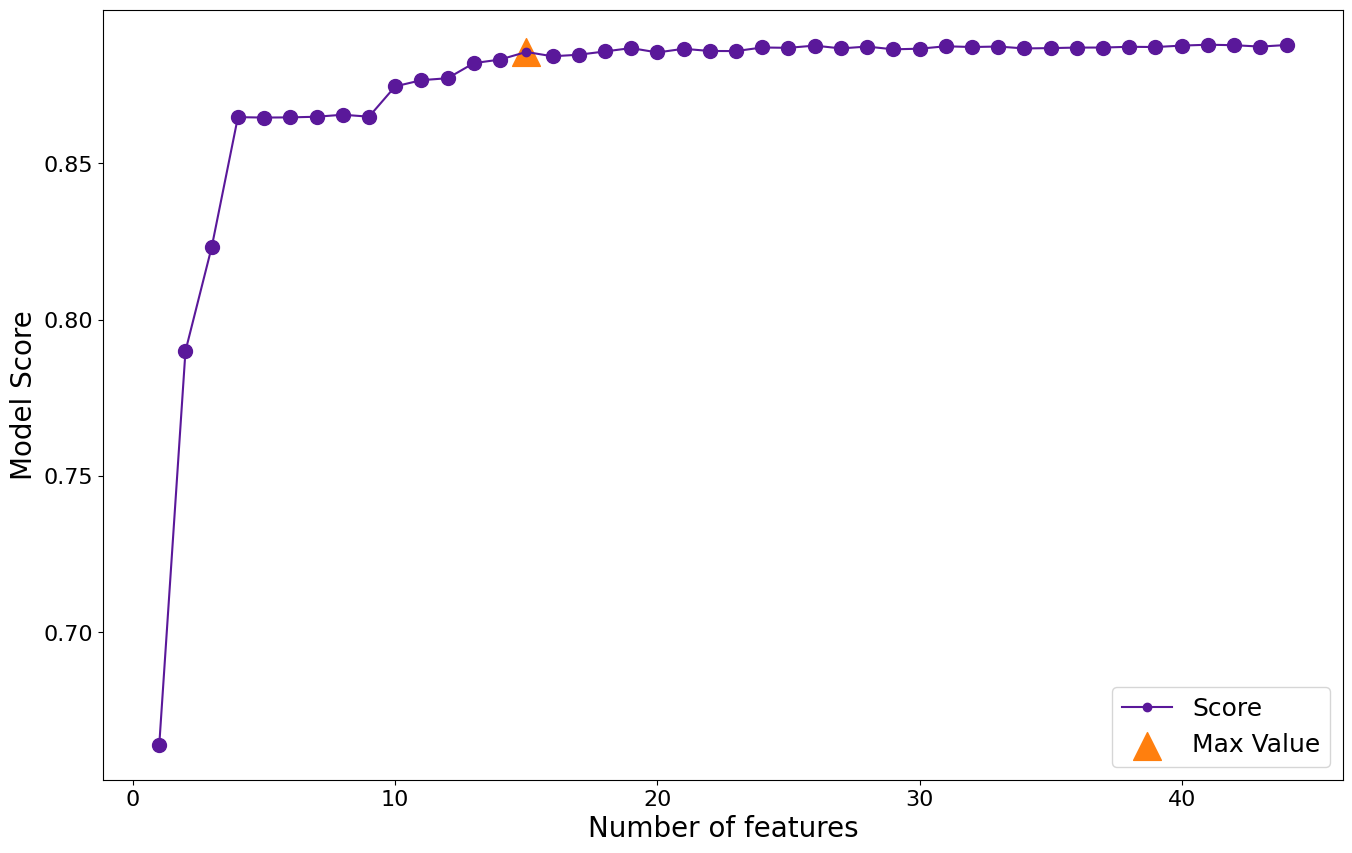

In [83]:
import matplotlib.pyplot as plt

# 模拟数据
x = range(1, len(score) + 1)
y = score

# 找到最大值的索引
max_index = 14

# 绘制折线图
plt.plot(x, y, color="#5A189A", marker='o', label='Score')

# 标记转折点和最大值点
for i in range(len(x)):
    if i == max_index:
        plt.scatter(x[i], y[i], color='#FF7F0E', marker='^', s=400, label='Max Value')
    else:
        plt.scatter(x[i], y[i], color='#5A189A', marker='o', s=100)

# 设置x轴和y轴标签
plt.xlabel('Number of features', fontsize=20)
plt.ylabel('Model Score', fontsize=20)

# 去除网格线
plt.grid(False)

# 设置图例位置到右下角，并加大字体
plt.legend(loc='lower right', fontsize=18, frameon=True)

# 显示图形
plt.show()


In [84]:
 for i in range(1,30):
    print(i,score[i])

1 0.7900039518786349
2 0.8232331502129261
3 0.8648267854269779
4 0.864693505196873
5 0.8647516441122794
6 0.8649577197285971
7 0.8656012335530597
8 0.8649723498992399
9 0.8746700452619262
10 0.8766604688367121
11 0.8772832713939207
12 0.8821142354307927
13 0.8832523462746078
14 0.8856837594180733
15 0.884302139569208
16 0.8847998862625678
17 0.8858507952749178
18 0.8869286680700862
19 0.8855240492333845
20 0.8866996112218537
21 0.8859937717500983
22 0.8859726049947861
23 0.8871179547063249
24 0.8870079711512127
25 0.8877186619360723
26 0.8868192800216279
27 0.8874118811160455
28 0.8865308817893254
29 0.8867258865523283


In [85]:

# for i in range(25,40):
#     print(i,score[i])
    
# 28

# score[28]
final_feature = []
for index, row in result2.iterrows():
    if row["score"] == score[14]:
        final_feature = row["col"]
final_feature 

Index(['Cell_area_measured', 'Cell_architecture', 'Cell_flexible',
       'Cell_semitransparent', 'Perovskite_band_gap',
       'Perovskite_deposition_number_of_deposition_steps',
       'Perovskite_deposition_quenching_induced_crystallisation',
       'Stabilised_performance_measured', 'ETL_thickness_zong',
       'a_ionsMendeleevNumber', 'a_ionsAtomicWeight',
       'long_formMendeleevNumber', 'long_formAtomicWeight',
       'long_formElectronegativity', 'long_formNfValence'],
      dtype='object')

In [86]:
final_feature =['Cell_area_measured', 'Cell_architecture', 'Cell_flexible',
       'Cell_semitransparent', 'Perovskite_band_gap',
       'Perovskite_deposition_number_of_deposition_steps',
       'Perovskite_deposition_quenching_induced_crystallisation',
       'Stabilised_performance_measured', 'ETL_thickness_zong',
       'a_ionsMendeleevNumber', 'a_ionsAtomicWeight',
       'long_formMendeleevNumber', 'long_formAtomicWeight',
       'long_formElectronegativity', 'long_formNfValence']

In [87]:
len(final_feature)
# X_train_fen

15

In [88]:
X_train_fen = X_train_fen[final_feature]
X_train_fen

,Cell_area_measured,Cell_architecture,Cell_flexible,Cell_semitransparent,Perovskite_band_gap,Perovskite_deposition_number_of_deposition_steps,Perovskite_deposition_quenching_induced_crystallisation,Stabilised_performance_measured,ETL_thickness_zong,a_ionsMendeleevNumber,a_ionsAtomicWeight,long_formMendeleevNumber,long_formAtomicWeight,long_formElectronegativity,long_formNfValence
2085,0.120,2,0,0,1.600000,1.0,1,0,50.0,88.87500,4.008130,82.666667,37.932059,2.756667,1.166667
13755,0.090,1,0,0,1.600000,1.0,0,0,200.0,92.29875,16.450057,94.220968,77.559342,2.911719,0.150538
15279,0.100,2,0,0,1.670000,1.0,1,0,50.0,88.87500,4.008130,89.333333,70.947242,2.733000,1.166667
10774,0.125,1,0,0,1.622000,1.0,1,0,40.0,78.04000,38.362601,80.997069,18.017973,2.938264,0.041034
14677,0.160,1,0,0,1.730000,1.0,1,0,80.0,661.00000,13219.587262,70.392453,74.819712,2.666962,2.615094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689,0.100,1,0,0,1.799375,1.0,1,0,30.0,92.38125,16.749862,94.217742,77.558054,2.911403,0.150538
8740,1.000,1,0,1,1.600000,2.0,0,0,260.0,88.87500,4.008130,82.666667,37.932059,2.756667,1.166667
16200,0.067,1,0,0,2.300000,0.0,1,1,300.0,88.87500,4.008130,87.506667,53.568967,2.796833,0.005833
6467,0.060,1,0,0,1.600000,1.0,0,0,70.0,88.87500,4.008130,82.666667,37.932059,2.756667,1.166667


In [89]:
X_test_fen = X_test_fen[final_feature]
X_test_fen

,Cell_area_measured,Cell_architecture,Cell_flexible,Cell_semitransparent,Perovskite_band_gap,Perovskite_deposition_number_of_deposition_steps,Perovskite_deposition_quenching_induced_crystallisation,Stabilised_performance_measured,ETL_thickness_zong,a_ionsMendeleevNumber,a_ionsAtomicWeight,long_formMendeleevNumber,long_formAtomicWeight,long_formElectronegativity,long_formNfValence
9738,0.040,1,0,0,1.730000,1.0,1,0,40.0,60.040000,16.595791,92.409385,76.883699,2.874438,0.007551
14306,0.040,1,0,0,1.600000,1.0,0,0,45.0,88.875000,4.008130,82.666667,37.932059,2.756667,1.166667
12137,0.050,1,0,0,1.600000,1.0,1,0,25.0,88.875000,4.008130,82.666667,37.932059,2.756667,1.166667
634,0.090,2,0,0,1.350000,1.0,0,1,6.0,88.875000,4.008130,81.645833,35.576363,2.705208,0.875000
10844,0.168,1,1,0,2.220000,1.0,0,0,70.0,88.875000,4.008130,88.833333,61.805228,2.830000,1.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,0.100,2,0,0,1.782857,1.0,1,1,42.0,88.012187,22.557642,92.414516,76.892154,2.874398,0.007527
2635,0.100,1,0,0,1.600000,1.0,0,0,50.0,88.875000,4.008130,82.666667,37.932059,2.756667,1.166667
6153,0.096,1,0,0,2.277000,1.0,1,0,660.0,88.875000,4.008130,88.833333,61.805228,2.830000,1.166667
11318,0.090,1,0,0,1.600000,2.0,0,0,260.0,88.875000,4.008130,89.352941,71.408961,2.726303,1.176471


In [90]:
##读取测试集
tcc_ce = pd.read_csv('ceshishujujiejue.csv',encoding='gbk')
tcc_ce= tcc_ce.drop(columns=["Unnamed: 0"])
y_ce = tcc_ce['JV_default_PCE']

y_ce = (y_ce >= 17).astype(int)


tcc_ce = tcc_ce[final_feature]



# 更新的替换字典（tihuan）用我的特征简写替代
tihuan = {
    'Cell_area_measured': r'$CA_m$',
    'Cell_architecture': r'$CA_a$',
    'Perovskite_band_gap': r'$PBG$',
    'Perovskite_deposition_number_of_deposition_steps': r'$PD_n$',
    'Perovskite_deposition_quenching_induced_crystallisation': r'$PD_q$',
    'Cell_number_of_cells_per_substrate': r'$C_{nocp}$',
    'Cell_flexible': r'$C_{flb}$',
    'Cell_semitransparent': r'$C_{smtp}$',
    'Perovskite_composition_perovskite_ABC3_structure': r'$PC_{ABC3}$',
    'Perovskite_composition_leadfree': r'$PC_{lf}$',
    'Perovskite_deposition_solvent_annealing': r'$PD_{sa}$',
    'Add_lay_front': r'$AL_{front}$',
    'JV_light_intensity': r'$JV_{light}$',
    'JV_light_masked_cell': r'$JV_{masked}$',
    'ETL_thickness_zong': r'$ETL_t$',
    'Stabilised_performance_measured': r'$SP_m$',
    'a_ionsMendeleevNumber': r'$A_{MN}$',
    'a_ionsAtomicWeight': r'$A_{AW}$',
    'a_ionsMeltingT': r'$a_{MT}$',
    '0-norm': r'$C_{norm}$',
    'long_formMendeleevNumber': r'$LF_{MN}$',
    'long_formAtomicWeight': r'$LF_{AW}$',
    'long_formMeltingT': r'$LF_{MT}$',
    'long_formElectronegativity': r'$LF_{E}$',
    'long_formNfValence': r'$LF_{V}$',
    'Cell_flexible':r'$CF_b$',
    'Cell_semitransparent': r'$CS_p$'
}

# 使用更新后的替换字典重命名
tcc_ce = tcc_ce.rename(columns=tihuan)

# tihuan
# 输出重命名后的结果
tcc_ce



,$CA_m$,$CA_a$,$CF_b$,$CS_p$,$PBG$,$PD_n$,$PD_q$,$SP_m$,$ETL_t$,$A_{MN}$,$A_{AW}$,$LF_{MN}$,$LF_{AW}$,$LF_{E}$,$LF_{V}$
0,0.133,2,0,0,1.42,0,1,0,40.0,6.64,2.477901,86.986468,23.738767,3.309330,0.000000
1,0.133,2,0,0,1.42,0,1,0,40.0,92.20,19.956432,86.986468,23.738767,3.309330,0.000000
2,0.133,2,0,0,1.42,0,1,0,40.0,92.20,19.956432,86.986468,23.738767,3.309330,0.000000
3,0.133,2,0,0,1.42,0,1,0,40.0,92.20,19.956432,86.986468,23.738767,3.309330,0.000000
4,0.133,2,0,0,1.42,0,1,0,8.0,92.20,19.956432,86.986468,23.738767,3.309330,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.058,2,0,0,1.54,0,1,0,39.0,88.06,24.369214,93.846774,77.978460,2.934398,0.150538
136,0.058,2,0,0,1.54,0,1,0,35.0,88.06,24.369214,93.846774,77.978460,2.934398,0.150538
137,0.058,2,0,0,1.54,0,1,0,35.0,88.06,24.369214,93.846774,77.978460,2.934398,0.150538
138,0.058,2,0,0,1.54,0,1,0,35.0,88.06,24.369214,93.846774,77.978460,2.934398,0.150538


In [91]:
y_ce

0      0
1      0
2      0
3      0
4      0
      ..
135    1
136    1
137    1
138    1
139    0
Name: JV_default_PCE, Length: 140, dtype: int64

In [92]:
# 更新的替换字典（tihuan）用我的特征简写替代
tihuan = {
    'Cell_area_measured': r'$CA_m$',
    'Cell_architecture': r'$CA_a$',
    'Perovskite_band_gap': r'$PBG$',
    'Perovskite_deposition_number_of_deposition_steps': r'$PD_n$',
    'Perovskite_deposition_quenching_induced_crystallisation': r'$PD_q$',
    'Cell_number_of_cells_per_substrate': r'$C_{nocp}$',
    'Cell_flexible': r'$C_{flb}$',
    'Cell_semitransparent': r'$C_{smtp}$',
    'Perovskite_composition_perovskite_ABC3_structure': r'$PC_{ABC3}$',
    'Perovskite_composition_leadfree': r'$PC_{lf}$',
    'Perovskite_deposition_solvent_annealing': r'$PD_{sa}$',
    'Add_lay_front': r'$AL_{front}$',
    'JV_light_intensity': r'$JV_{light}$',
    'JV_light_masked_cell': r'$JV_{masked}$',
    'ETL_thickness_zong': r'$ETL_t$',
    'Stabilised_performance_measured': r'$SP_m$',
    'a_ionsMendeleevNumber': r'$A_{MN}$',
    'a_ionsAtomicWeight': r'$A_{AW}$',
    'a_ionsMeltingT': r'$a_{MT}$',
    '0-norm': r'$C_{norm}$',
    'long_formMendeleevNumber': r'$LF_{MN}$',
    'long_formAtomicWeight': r'$LF_{AW}$',
    'long_formMeltingT': r'$LF_{MT}$',
    'long_formElectronegativity': r'$LF_{E}$',
    'long_formNfValence': r'$LF_{V}$',
    'Cell_flexible':r'$CF_b$',
    'Cell_semitransparent': r'$CS_p$'
}

# 使用更新后的替换字典重命名
X_train_fen = X_train_fen.rename(columns=tihuan)

# 输出重命名后的结果
X_train_fen


,$CA_m$,$CA_a$,$CF_b$,$CS_p$,$PBG$,$PD_n$,$PD_q$,$SP_m$,$ETL_t$,$A_{MN}$,$A_{AW}$,$LF_{MN}$,$LF_{AW}$,$LF_{E}$,$LF_{V}$
2085,0.120,2,0,0,1.600000,1.0,1,0,50.0,88.87500,4.008130,82.666667,37.932059,2.756667,1.166667
13755,0.090,1,0,0,1.600000,1.0,0,0,200.0,92.29875,16.450057,94.220968,77.559342,2.911719,0.150538
15279,0.100,2,0,0,1.670000,1.0,1,0,50.0,88.87500,4.008130,89.333333,70.947242,2.733000,1.166667
10774,0.125,1,0,0,1.622000,1.0,1,0,40.0,78.04000,38.362601,80.997069,18.017973,2.938264,0.041034
14677,0.160,1,0,0,1.730000,1.0,1,0,80.0,661.00000,13219.587262,70.392453,74.819712,2.666962,2.615094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689,0.100,1,0,0,1.799375,1.0,1,0,30.0,92.38125,16.749862,94.217742,77.558054,2.911403,0.150538
8740,1.000,1,0,1,1.600000,2.0,0,0,260.0,88.87500,4.008130,82.666667,37.932059,2.756667,1.166667
16200,0.067,1,0,0,2.300000,0.0,1,1,300.0,88.87500,4.008130,87.506667,53.568967,2.796833,0.005833
6467,0.060,1,0,0,1.600000,1.0,0,0,70.0,88.87500,4.008130,82.666667,37.932059,2.756667,1.166667


In [93]:

X_test_fen =X_test_fen.rename(columns=tihuan)
X_test_fen 

,$CA_m$,$CA_a$,$CF_b$,$CS_p$,$PBG$,$PD_n$,$PD_q$,$SP_m$,$ETL_t$,$A_{MN}$,$A_{AW}$,$LF_{MN}$,$LF_{AW}$,$LF_{E}$,$LF_{V}$
9738,0.040,1,0,0,1.730000,1.0,1,0,40.0,60.040000,16.595791,92.409385,76.883699,2.874438,0.007551
14306,0.040,1,0,0,1.600000,1.0,0,0,45.0,88.875000,4.008130,82.666667,37.932059,2.756667,1.166667
12137,0.050,1,0,0,1.600000,1.0,1,0,25.0,88.875000,4.008130,82.666667,37.932059,2.756667,1.166667
634,0.090,2,0,0,1.350000,1.0,0,1,6.0,88.875000,4.008130,81.645833,35.576363,2.705208,0.875000
10844,0.168,1,1,0,2.220000,1.0,0,0,70.0,88.875000,4.008130,88.833333,61.805228,2.830000,1.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,0.100,2,0,0,1.782857,1.0,1,1,42.0,88.012187,22.557642,92.414516,76.892154,2.874398,0.007527
2635,0.100,1,0,0,1.600000,1.0,0,0,50.0,88.875000,4.008130,82.666667,37.932059,2.756667,1.166667
6153,0.096,1,0,0,2.277000,1.0,1,0,660.0,88.875000,4.008130,88.833333,61.805228,2.830000,1.166667
11318,0.090,1,0,0,1.600000,2.0,0,0,260.0,88.875000,4.008130,89.352941,71.408961,2.726303,1.176471


In [94]:
dddddddd = pd.DataFrame(y_train_fen)
# dddddddd
# tihuan

In [95]:
y_re_comun = {'JV_default_PCE': r'$E^{p\ pce}$'}
y_resampled_gai=dddddddd.rename(columns=y_re_comun)
y_resampled_gai

,$E^{p\ pce}$
2085,0
13755,0
15279,0
10774,0
14677,0
...,...
9689,1
8740,0
16200,0
6467,0


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found becau

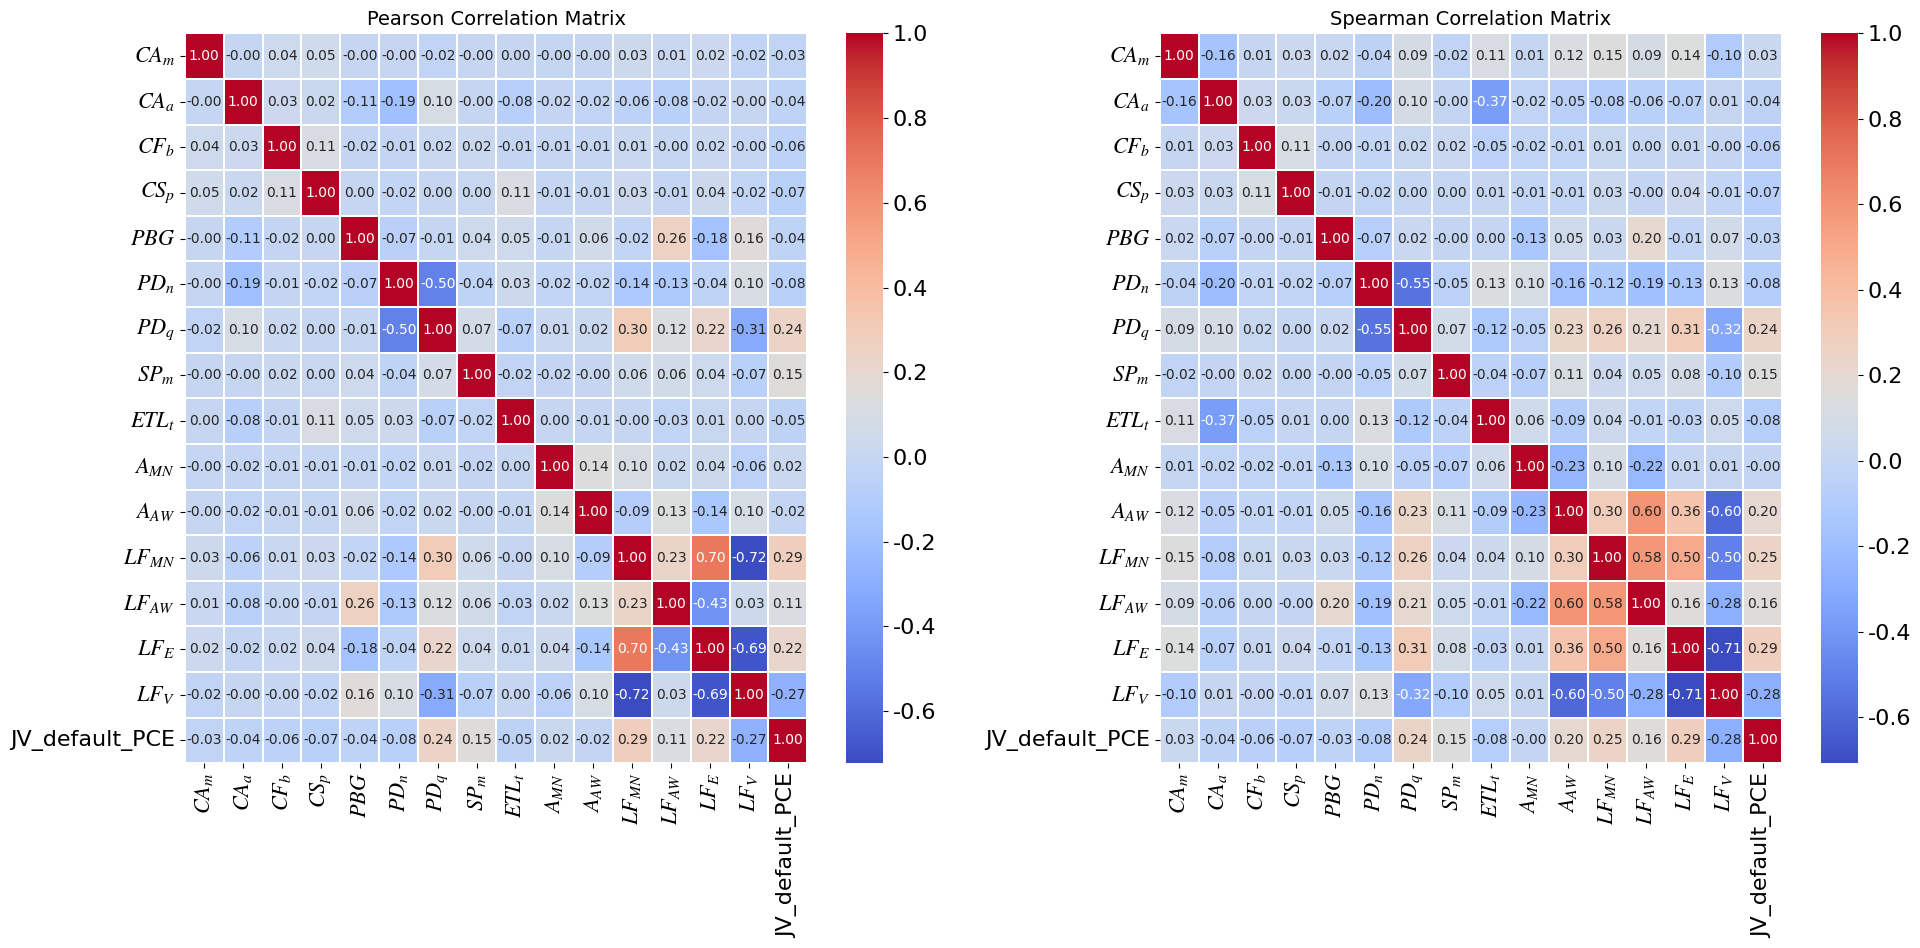

In [96]:
# 展示皮尔逊和斯皮尔曼相关系数的比较
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# 皮尔逊相关系数热图
sns.heatmap(
    data=pd.concat([X_train_fen, y_train_fen], axis=1).corr(method='pearson'),
    annot=True,
    linewidths=0.3,
    cmap="coolwarm",
    fmt='.2f',
    annot_kws={'size': 10, 'weight': 'normal'},
    ax=axes[0]
)
axes[0].set_title('Pearson Correlation Matrix', fontsize=14)
axes[0].tick_params(axis='y', rotation=0)

# 斯皮尔曼相关系数热图
sns.heatmap(
    data=pd.concat([X_train_fen, y_train_fen], axis=1).corr(method='spearman'),
    annot=True,
    linewidths=0.3,
    cmap="coolwarm",
    fmt='.2f',
    annot_kws={'size': 10, 'weight': 'normal'},
    ax=axes[1]
)
axes[1].set_title('Spearman Correlation Matrix', fontsize=14)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()


In [98]:
# plt.figure(figsize=(15,15))
# sns.heatmap(data=pd.concat([X_train_fen,y_train_fen],axis=1).corr(),annot=True,linewidths=0.3,cmap="Blues_r",fmt='.2f',
#            annot_kws={'size':12,'weight':'normal'}) 
# plt.yticks(rotation=0)
# plt.show()

In [99]:
! pip install optuna

# 模型预测

# 随机森林

In [100]:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import optuna  
from sklearn.cluster import KMeans

In [ ]:
# 定义优化目标函数
def optuna_objective(trial):
    # 使用KMeans进行聚类
    n_clusters = trial.suggest_int("n_clusters", 1, 10)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_fen)
    clusters = kmeans.labels_

    # 使用KFold进行交叉验证
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_list = []
    flag = False
    for cluster in range(n_clusters):
        # 选择当前聚类的数据
        mask = (clusters == cluster)
        X_cluster = X_train_fen[mask]
        y_cluster = y_train_fen[mask]

        if len(X_cluster) == 0:  # 如果某个聚类没有样本，跳过
            continue
        unique_classes, counts = np.unique(y_cluster, return_counts=True)    
        if len(unique_classes) < 2:
            flag =True
            break

        # 针对每个聚类，定义不同的参数空间

        max_depth = trial.suggest_int(f"max_depth_{cluster}", 3, 60,1)
        min_samples_split = trial.suggest_int(f"min_samples_split_{cluster}", 2, 10,1)
        max_features = trial.suggest_float(f"max_features_{cluster}", 0.4, 0.8)
        n_estimators = trial.suggest_int(f"n_estimators_{cluster}",5,500,1)


        
        fold_accuracies = []

        for train_index, val_index in cv.split(X_cluster):
            # 使用iloc进行索引
            X_train_fold = X_cluster.iloc[train_index]
            X_val_fold = X_cluster.iloc[val_index]
            y_train_fold = y_cluster.iloc[train_index]
            y_val_fold = y_cluster.iloc[val_index]

            # 训练HGBM模型
            model = RandomForestClassifier(n_estimators = n_estimators
                      ,max_depth = max_depth
                      ,min_samples_split = min_samples_split
                      ,max_features = max_features
                     )
    
            model.fit(X_train_fold, y_train_fold)

            # 进行验证
            val_predictions = model.predict(X_val_fold)
            fold_accuracy = accuracy_score(y_val_fold, val_predictions)
            fold_accuracies.append(fold_accuracy)

        # 记录该聚类的平均准确度
        accuracy_list.append(np.mean(fold_accuracies))
    if flag:
        return 0;
    # 返回所有聚类的平均准确度
    return np.mean(accuracy_list) if accuracy_list else 0

In [ ]:
# def optuna_objective(trial):
    
    
# #     {'depth': [5,6,7,8],
# #           'iterations':[500,550,560],
# #           'learning_rate':[0.2,0.3,0.4], 
# #          'od_wait':[1,5,10]}
#     #定义参数空间

#     max_depth = trial.suggest_int("max_depth",3,60,1)
#     min_samples_split = trial.suggest_int("min_samples_split",2,10,1)
#     n_estimators = trial.suggest_int("n_estimators",5,500,1)
#     #max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"]) #字符型
#     max_features = trial.suggest_float("max_features",0.4,0.8)
#     #定义评估器
#     #需要优化的参数由上述参数空间决定
#     #不需要优化的参数则直接填写具体值
#     reg = RandomForestClassifier(n_estimators = n_estimators
#               ,max_depth = max_depth
#               ,min_samples_split = min_samples_split
#               ,max_features = max_features
#              )
    
#     #交叉验证过程，输出负均方根误差(-RMSE)
#     #optuna同时支持最大化和最小化，因此如果输出-RMSE，则选择最大化
#     #如果选择输出RMSE，则选择最小化
#     cv = KFold(n_splits=5,shuffle=True,random_state=99)
#     validation_loss = cross_validate(reg,X_train_fen,y_train_fen
#                                      ,scoring="f1"
#                                      ,cv=cv #交叉验证模式
#                                      ,verbose=False #是否打印进程
#                                      ,n_jobs=48 #线程数
#                                      ,error_score='raise'
#                                     )
#     #最终输出RMSE
#     return np.mean(abs(validation_loss["test_score"]))

In [ ]:
def optimizer_optuna(n_trials, algo):
    
    #定义使用TPE或者GP
    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', #选择高斯过程
                                          'n_initial_points':10, #初始观测点10个
                                          'acq_func':'EI'} #选择的采集函数为EI，期望增量
                           )
    
    #实际优化过程，首先实例化优化器
    study = optuna.create_study(sampler = algo #要使用的具体算法
                                , direction="maximize" #优化的方向，可以填写minimize或maximize
                               )
    #开始优化，n_trials为允许的最大迭代次数
    #由于参数空间已经在目标函数中定义好，因此不需要输入参数空间
    study.optimize(optuna_objective #目标函数
                   , n_trials=n_trials #最大迭代次数（包括最初的观测值的）
                   , show_progress_bar=True #要不要展示进度条呀？
                  )
    
    #可直接从优化好的对象study中调用优化的结果
    #打印最佳参数与最佳损失值
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

In [ ]:
import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

In [ ]:
optuna.logging.set_verbosity(optuna.logging.ERROR) #关闭自动打印的info，只显示进度条
#optuna.logging.set_verbosity(optuna.logging.INFO)
best_params, best_score = optimizer_optuna(300,"TPE")

In [101]:
# 复制最终结果到这
best_params_reg = {'n_clusters': 5, 'max_depth_0': 32, 'min_samples_split_0': 7, 'max_features_0': 0.6330256916123636, 'n_estimators_0': 23, 'max_depth_1': 58, 'min_samples_split_1': 2, 'max_features_1': 0.4729735849460853, 'n_estimators_1': 404, 'max_depth_2': 15, 'min_samples_split_2': 7, 'max_features_2': 0.6320790243599609, 'n_estimators_2': 67, 'max_depth_3': 56, 'min_samples_split_3': 8, 'max_features_3': 0.7837201728045322, 'n_estimators_3': 125, 'max_depth_4': 52, 'min_samples_split_4': 10, 'max_features_4': 0.5987545993943975, 'n_estimators_4': 389}
#best_params_reg = {'n_clusters': 5, 'max_depth_0': 30, 'min_samples_split_0': 3, 'max_features_0': 0.4073910313805536, 'n_estimators_0': 383, 'max_depth_1': 58, 'min_samples_split_1': 2, 'max_features_1': 0.4729735849460853, 'n_estimators_1': 404, 'max_depth_2': 21, 'min_samples_split_2': 7, 'max_features_2': 0.6320790243599609, 'n_estimators_2': 67, 'max_depth_3': 41, 'min_samples_split_3': 8, 'max_features_3': 0.7837201728045322, 'n_estimators_3': 214, 'max_depth_4': 52, 'min_samples_split_4': 10, 'max_features_4': 0.5987545993943975, 'n_estimators_4': 389}
#best_params = {'n_clusters': 5, 'max_depth_0': 28, 'min_samples_split_0': 3, 'max_features_0': 0.6078421918919733, 'n_estimators_0': 405, 'max_depth_1': 26, 'min_samples_split_1': 3, 'max_features_1': 0.4937784344019256, 'n_estimators_1': 71, 'max_depth_2': 58, 'min_samples_split_2': 9, 'max_features_2': 0.7894836216283877, 'n_estimators_2': 345, 'max_depth_3': 58, 'min_samples_split_3': 9, 'max_features_3': 0.7261158513389657, 'n_estimators_3': 270, 'max_depth_4': 24, 'min_samples_split_4': 10, 'max_features_4': 0.4120049744170951, 'n_estimators_4': 448} 
# best_params = {'max_depth': 52, 'min_samples_split': 4, 'n_estimators': 469, 'max_features': 0.6253702064528093,'random_state':99} 


In [102]:
# 复制最终结果到这
best_params_reg = {'n_clusters': 2, 'max_depth_0': 32, 'min_samples_split_0': 7, 'max_features_0': 0.6330256916123636, 'n_estimators_0': 23, 'max_depth_1': 58, 'min_samples_split_1': 2, 'max_features_1': 0.4729735849460853, 'n_estimators_1': 404, 'max_depth_2': 15, 'min_samples_split_2': 7, 'max_features_2': 0.6320790243599609, 'n_estimators_2': 67, 'max_depth_3': 56, 'min_samples_split_3': 8, 'max_features_3': 0.7837201728045322, 'n_estimators_3': 125, 'max_depth_4': 52, 'min_samples_split_4': 10, 'max_features_4': 0.5987545993943975, 'n_estimators_4': 389}
#best_params_reg = {'n_clusters': 5, 'max_depth_0': 30, 'min_samples_split_0': 3, 'max_features_0': 0.4073910313805536, 'n_estimators_0': 383, 'max_depth_1': 58, 'min_samples_split_1': 2, 'max_features_1': 0.4729735849460853, 'n_estimators_1': 404, 'max_depth_2': 21, 'min_samples_split_2': 7, 'max_features_2': 0.6320790243599609, 'n_estimators_2': 67, 'max_depth_3': 41, 'min_samples_split_3': 8, 'max_features_3': 0.7837201728045322, 'n_estimators_3': 214, 'max_depth_4': 52, 'min_samples_split_4': 10, 'max_features_4': 0.5987545993943975, 'n_estimators_4': 389}
#best_params = {'n_clusters': 5, 'max_depth_0': 28, 'min_samples_split_0': 3, 'max_features_0': 0.6078421918919733, 'n_estimators_0': 405, 'max_depth_1': 26, 'min_samples_split_1': 3, 'max_features_1': 0.4937784344019256, 'n_estimators_1': 71, 'max_depth_2': 58, 'min_samples_split_2': 9, 'max_features_2': 0.7894836216283877, 'n_estimators_2': 345, 'max_depth_3': 58, 'min_samples_split_3': 9, 'max_features_3': 0.7261158513389657, 'n_estimators_3': 270, 'max_depth_4': 24, 'min_samples_split_4': 10, 'max_features_4': 0.4120049744170951, 'n_estimators_4': 448} 
# best_params = {'max_depth': 52, 'min_samples_split': 4, 'n_estimators': 469, 'max_features': 0.6253702064528093,'random_state':99} 


In [103]:
# 假设我们已经对测试集进行了KMeans聚类，获得了test_clusters
kmeans = KMeans(n_clusters=best_params_reg['n_clusters'], random_state=42)
kmeans.fit(X_train_fen)
# 获取每个样本的聚类标签
clusters = kmeans.labels_

 # 针对每个聚类进行训练和预测
# 为每个聚类训练Hgbt模型
models = {}
for cluster in range(best_params_reg['n_clusters']):
    # 选择当前聚类的数据
    X_cluster = X_train_fen[clusters == cluster]
    y_cluster = y_train_fen[clusters == cluster]

    # 训练Hgbt模型
    model =RandomForestClassifier(
            n_estimators=best_params_reg[f'n_estimators_{cluster}'],
            max_depth=best_params_reg[f'max_depth_{cluster}'],
            min_samples_split=best_params_reg[f'min_samples_split_{cluster}'],
            max_features=best_params_reg[f'max_features_{cluster}']
        )
    model.fit(X_cluster, y_cluster)
    
    # 存储模型
    models[cluster] = model

# 进行预测
predictions = np.zeros_like(y_ce)
y_scores = np.zeros_like(y_ce, dtype=float)  # 用于存储预测概率

for cluster in range(best_params_reg['n_clusters']):
    # 对测试集进行聚类预测
    test_clusters = kmeans.predict(tcc_ce)
    
    # 选择当前聚类的测试数据
    X_test_cluster = tcc_ce[test_clusters == cluster]
    if len(X_test_cluster) > 0:
        pred = models[cluster].predict(X_test_cluster)
        predictions[test_clusters == cluster] = pred
# 获取预测概率
        prob = models[cluster].predict_proba(X_test_cluster)
        if prob.shape[1] > 1:
            y_scores[test_clusters == cluster] = prob[:, 1]  # 选择正类的概率
        else:
            y_scores[test_clusters == cluster] = prob[:, 0]  # 这里假设只预测到一个类，则选择第一个

print(calculate_metrics(y_ce, predictions))
print( roc_auc_score(y_ce, y_scores))

{'准确率': 0.4857142857142857, '召回率': 0.4857142857142857, '精确率': 0.23591836734693875, 'F1分数': 0.31758241758241756}
0.7236519607843137


In [115]:
pruned_tcc.to_csv('lastceshi.csv',encoding='gbk')

In [110]:
# 假设我们已经对测试集进行了KMeans聚类，获得了test_clusters
kmeans = KMeans(n_clusters=best_params_reg['n_clusters'], random_state=42)
kmeans.fit(X_train_fen)
# 获取每个样本的聚类标签
clusters = kmeans.labels_

 # 针对每个聚类进行训练和预测
# 为每个聚类训练Hgbt模型
models = {}
for cluster in range(best_params_reg['n_clusters']):
    # 选择当前聚类的数据
    X_cluster = X_train_fen[clusters == cluster]
    y_cluster = y_train_fen[clusters == cluster]

    # 训练Hgbt模型
    model =RandomForestClassifier(
            n_estimators=best_params_reg[f'n_estimators_{cluster}'],
            max_depth=best_params_reg[f'max_depth_{cluster}'],
            min_samples_split=best_params_reg[f'min_samples_split_{cluster}'],
            max_features=best_params_reg[f'max_features_{cluster}']
        )
    model.fit(X_cluster, y_cluster)
    
    # 存储模型
    models[cluster] = model

# 进行预测
predictions = np.zeros_like(pruned_y)
y_scores = np.zeros_like(pruned_y, dtype=float)  # 用于存储预测概率

for cluster in range(best_params_reg['n_clusters']):
    # 对测试集进行聚类预测
    test_clusters = kmeans.predict(pruned_tcc)
    
    # 选择当前聚类的测试数据
    X_test_cluster = pruned_tcc[test_clusters == cluster]
    if len(X_test_cluster) > 0:
        pred = models[cluster].predict(X_test_cluster)
        predictions[test_clusters == cluster] = pred
# 获取预测概率
        prob = models[cluster].predict_proba(X_test_cluster)
        if prob.shape[1] > 1:
            y_scores[test_clusters == cluster] = prob[:, 1]  # 选择正类的概率
        else:
            y_scores[test_clusters == cluster] = prob[:, 0]  # 这里假设只预测到一个类，则选择第一个

print(calculate_metrics(pruned_y, predictions))
print( roc_auc_score(pruned_y, y_scores))

{'准确率': 0.7157894736842105, '召回率': 0.7157894736842105, '精确率': 0.5123545706371191, 'F1分数': 0.5972231191475621}
0.4673202614379085


In [ ]:
tcc_ce = pd.read_csv('ceshishujujiejue.csv',encoding='gbk')

In [ ]:
# 假设我们已经对测试集进行了KMeans聚类，获得了test_clusters
kmeans = KMeans(n_clusters=best_params_reg['n_clusters'], random_state=42)
kmeans.fit(X_train_fen)
# 获取每个样本的聚类标签
clusters = kmeans.labels_

# 初始化预测结果
predictions = np.zeros_like(y_test_fen)

 # 针对每个聚类进行训练和预测
# 为每个聚类训练Hgbt模型
models = {}
for cluster in range(best_params_reg['n_clusters']):
    # 选择当前聚类的数据
    X_cluster = X_train_fen[clusters == cluster]
    y_cluster = y_train_fen[clusters == cluster]

    # 训练Hgbt模型
    model =RandomForestClassifier(
            n_estimators=best_params_reg[f'n_estimators_{cluster}'],
            max_depth=best_params_reg[f'max_depth_{cluster}'],
            min_samples_split=best_params_reg[f'min_samples_split_{cluster}'],
            max_features=best_params_reg[f'max_features_{cluster}']
        )
    model.fit(X_cluster, y_cluster)
    
    # 存储模型
    models[cluster] = model

# 进行预测
predictions = np.zeros_like(y_test_fen)
y_scores = np.zeros_like(y_test_fen, dtype=float)  # 用于存储预测概率

for cluster in range(best_params_reg['n_clusters']):
    # 对测试集进行聚类预测
    test_clusters = kmeans.predict(X_test_fen)
    
    # 选择当前聚类的测试数据
    X_test_cluster = X_test_fen[test_clusters == cluster]
    if len(X_test_cluster) > 0:
        pred = models[cluster].predict(X_test_cluster)
        predictions[test_clusters == cluster] = pred
# 获取预测概率
        prob = models[cluster].predict_proba(X_test_cluster)
        if prob.shape[1] > 1:
            y_scores[test_clusters == cluster] = prob[:, 1]  # 选择正类的概率
        else:
            y_scores[test_clusters == cluster] = prob[:, 0]  # 这里假设只预测到一个类，则选择第一个

print(calculate_metrics(y_test_fen, predictions))
print( roc_auc_score(y_test_fen, y_scores))

In [ ]:
# 假设我们已经对测试集进行了KMeans聚类，获得了test_clusters
kmeans = KMeans(n_clusters=best_params_reg['n_clusters'], random_state=42)
kmeans.fit(X_train_fen)
# 获取每个样本的聚类标签
clusters = kmeans.labels_

 # 针对每个聚类进行训练和预测
# 为每个聚类训练Hgbt模型
models = {}
for cluster in range(best_params_reg['n_clusters']):
    # 选择当前聚类的数据
    X_cluster = X_train_fen[clusters == cluster]
    y_cluster = y_train_fen[clusters == cluster]

    # 训练Hgbt模型
    model =RandomForestClassifier(
            n_estimators=best_params_reg[f'n_estimators_{cluster}'],
            max_depth=best_params_reg[f'max_depth_{cluster}'],
            min_samples_split=best_params_reg[f'min_samples_split_{cluster}'],
            max_features=best_params_reg[f'max_features_{cluster}']
        )
    model.fit(X_cluster, y_cluster)
    
    # 存储模型
    models[cluster] = model

# 进行预测
predictions = np.zeros_like(y_ce)
y_scores = np.zeros_like(y_ce, dtype=float)  # 用于存储预测概率

for cluster in range(best_params_reg['n_clusters']):
    # 对测试集进行聚类预测
    test_clusters = kmeans.predict(tcc_ce)
    
    # 选择当前聚类的测试数据
    X_test_cluster = tcc_ce[test_clusters == cluster]
    if len(X_test_cluster) > 0:
        pred = models[cluster].predict(X_test_cluster)
        predictions[test_clusters == cluster] = pred
# 获取预测概率
        prob = models[cluster].predict_proba(X_test_cluster)
        if prob.shape[1] > 1:
            y_scores[test_clusters == cluster] = prob[:, 1]  # 选择正类的概率
        else:
            y_scores[test_clusters == cluster] = prob[:, 0]  # 这里假设只预测到一个类，则选择第一个

print(calculate_metrics(y_ce, predictions))
print( roc_auc_score(y_ce, y_scores))

In [ ]:
# 决策树模型，gbdt模型，逻辑回归模型

# 决策树模型

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 定义优化目标函数
def optuna_objective(trial):
    # 使用KMeans进行聚类
    n_clusters = trial.suggest_int("n_clusters", 1, 10)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_fen)
    clusters = kmeans.labels_

    # 使用KFold进行交叉验证
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_list = []
    flag = False
    for cluster in range(n_clusters):
        # 选择当前聚类的数据
        mask = (clusters == cluster)
        X_cluster = X_train_fen[mask]
        y_cluster = y_train_fen[mask]

        if len(X_cluster) == 0:  # 如果某个聚类没有样本，跳过
            continue
        unique_classes, counts = np.unique(y_cluster, return_counts=True)    
        if len(unique_classes) < 2:
            flag =True
            break

        # 针对每个聚类，定义不同的参数空间

        max_depth = trial.suggest_int(f"max_depth_{cluster}", 3, 60,1)
        min_samples_split = trial.suggest_int(f"min_samples_split_{cluster}", 2, 1000,1)
        max_features = trial.suggest_float(f"max_features_{cluster}", 0.4, 0.8)
        fold_accuracies = []

        for train_index, val_index in cv.split(X_cluster):
            # 使用iloc进行索引
            X_train_fold = X_cluster.iloc[train_index]
            X_val_fold = X_cluster.iloc[val_index]
            y_train_fold = y_cluster.iloc[train_index]
            y_val_fold = y_cluster.iloc[val_index]

            # 训练HGBM模型
            model = DecisionTreeClassifier(
                      max_depth = max_depth
                       ,max_features = max_features
                      ,min_samples_split = min_samples_split
                        ,random_state=42
                        )
    
            model.fit(X_train_fold, y_train_fold)

            # 进行验证
            val_predictions = model.predict(X_val_fold)
            fold_accuracy = accuracy_score(y_val_fold, val_predictions)
            fold_accuracies.append(fold_accuracy)

        # 记录该聚类的平均准确度
        accuracy_list.append(np.mean(fold_accuracies))

    if flag:
        return 0;
    # 返回所有聚类的平均准确度
    return np.mean(accuracy_list) if accuracy_list else 0

In [ ]:
# def optuna_objective(trial):
    
    
# #     {'depth': [5,6,7,8],
# #           'iterations':[500,550,560],
# #           'learning_rate':[0.2,0.3,0.4], 
# #          'od_wait':[1,5,10]}
#     #定义参数空间

#     max_depth = trial.suggest_int("max_depth",3,60,1)
#     min_samples_split = trial.suggest_int("min_samples_split",2,1000,1)

# #     max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"]) #字符型

#     #定义参数空间
#     max_features = trial.suggest_float("max_features",0.4,0.8)
#     #定义评估器
#     #需要优化的参数由上述参数空间决定
#     #不需要优化的参数则直接填写具体值
#     dectbei = DecisionTreeClassifier(
#               max_depth = max_depth
#                ,max_features = max_features
#               ,min_samples_split = min_samples_split
#                 ,random_state=42
#                 )
    
#     #交叉验证过程，输出负均方根误差(-RMSE)
#     #optuna同时支持最大化和最小化，因此如果输出-RMSE，则选择最大化
#     #如果选择输出RMSE，则选择最小化
#     cv = KFold(n_splits=5,shuffle=True,random_state=99)
#     validation_loss = cross_validate(dectbei,X_train_fen,y_train_fen
#                                      ,scoring="f1"
#                                      ,cv=cv #交叉验证模式
#                                      ,verbose=False #是否打印进程
#                                      ,n_jobs=48 #线程数
#                                      ,error_score='raise'
#                                     )
#     #最终输出RMSE
#     return np.mean(abs(validation_loss["test_score"]))

In [ ]:
def optimizer_optuna(n_trials, algo):
    
    #定义使用TPE或者GP
    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', #选择高斯过程
                                          'n_initial_points':10, #初始观测点10个
                                          'acq_func':'EI'} #选择的采集函数为EI，期望增量
                           )
    
    #实际优化过程，首先实例化优化器
    study = optuna.create_study(sampler = algo #要使用的具体算法
                                , direction="maximize" #优化的方向，可以填写minimize或maximize
                               )
    #开始优化，n_trials为允许的最大迭代次数
    #由于参数空间已经在目标函数中定义好，因此不需要输入参数空间
    study.optimize(optuna_objective #目标函数
                   , n_trials=n_trials #最大迭代次数（包括最初的观测值的）
                   , show_progress_bar=True #要不要展示进度条呀？
                  )
    
    #可直接从优化好的对象study中调用优化的结果
    #打印最佳参数与最佳损失值
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

In [ ]:
import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

In [ ]:
optuna.logging.set_verbosity(optuna.logging.ERROR) #关闭自动打印的info，只显示进度条
#optuna.logging.set_verbosity(optuna.logging.INFO)
best_params, best_score = optimizer_optuna(300,"TPE")

In [ ]:
# best_params_dect = best_params
best_params_dtree = {'n_clusters': 3, 'max_depth_0': 47, 'min_samples_split_0': 49, 'max_features_0': 0.4187517952454581, 'max_depth_1': 46, 'min_samples_split_1': 4, 'max_features_1': 0.424147547572844, 'max_depth_2': 51, 'min_samples_split_2': 800, 'max_features_2': 0.4595725042642827} 
#best_params = {'max_depth': 39, 'min_samples_split': 2, 'max_features': 0.6961058593165989}
# best_params_dect =  {'max_depth': 42, 'min_samples_split': 2, 'max_features': 0.6886677846165485,"random_state": 80} 

In [ ]:
# 假设我们已经对测试集进行了KMeans聚类，获得了test_clusters
# kmeans = KMeans(n_clusters=best_params_dtree['n_clusters'], init='k-means++', random_state=42, n_init=10)

kmeans = KMeans(n_clusters=best_params_dtree['n_clusters'], random_state=42)
kmeans.fit(X_train_fen)
# 获取每个样本的聚类标签
clusters = kmeans.labels_

# 初始化预测结果
predictions = np.zeros_like(y_test_fen)

 # 针对每个聚类进行训练和预测
# 为每个聚类训练Hgbt模型
models = {}
for cluster in range(best_params_dtree['n_clusters']):
    # 选择当前聚类的数据
    X_cluster = X_train_fen[clusters == cluster]
    y_cluster = y_train_fen[clusters == cluster]

    # 训练Hgbt模型
    model =DecisionTreeClassifier(
            min_samples_split=best_params_dtree[f'min_samples_split_{cluster}'],
            max_depth=best_params_dtree[f'max_depth_{cluster}'],
            max_features=best_params_dtree[f'max_features_{cluster}']
        )
    model.fit(X_cluster, y_cluster)
    
    # 存储模型
    models[cluster] = model

# 进行预测
predictions = np.zeros_like(y_test_fen)
y_scores = np.zeros_like(y_test_fen, dtype=float)  # 用于存储预测概率

for cluster in range(best_params_dtree['n_clusters']):
    # 对测试集进行聚类预测
    test_clusters = kmeans.predict(X_test_fen)
    
    # 选择当前聚类的测试数据
    X_test_cluster = X_test_fen[test_clusters == cluster]
    if len(X_test_cluster) > 0:
        pred = models[cluster].predict(X_test_cluster)
        predictions[test_clusters == cluster] = pred
# 获取预测概率
        prob = models[cluster].predict_proba(X_test_cluster)
        if prob.shape[1] > 1:
            y_scores[test_clusters == cluster] = prob[:, 1]  # 选择正类的概率
        else:
            y_scores[test_clusters == cluster] = prob[:, 0]  # 这里假设只预测到一个类，则选择第一个

print(calculate_metrics(y_test_fen, predictions))
print( roc_auc_score(y_test_fen, y_scores))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE # 另一种降维方法，对非线性结构更好，但计算量大，需要安装scikit-learn 0.22+

# 假设 X_train_fen 是您的训练特征数据 (已经过预处理)
# 假设 kmeans 是您已经 fit 在 X_train_fen 上的 KMeans 模型
# 假设 clusters = kmeans.labels_ 已经计算好

# 1. 对训练数据进行降维 (例如，降到2维)
# 可以选择 PCA, TSNE 或 UMAP 等
# PCA 是线性的，计算快，适用于展示最大方差方向
# t-SNE 或 UMAP 更适合展示高维数据中的非线性结构和簇的紧密度，但它们不保留距离，只保留局部结构
# 我们先使用 PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_fen)

# 2. 绘制聚类结果
plt.figure(figsize=(10, 7))

# 使用 seaborn 的 scatterplot 可以方便地按类别着色
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=clusters, palette='viridis', legend='full')

# 添加标题和标签
plt.title('K-Means Clustering Visualization after PCA (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# 您也可以尝试使用 t-SNE (如果安装了较新版本的 sklearn)
# from sklearn.manifold import TSNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300) # 参数可能需要调整
# X_train_tsne = tsne.fit_transform(X_train_fen)

# plt.figure(figsize=(10, 7))
# sns.scatterplot(x=X_train_tsne[:, 0], y=X_train_tsne[:, 1], hue=clusters, palette='viridis', legend='full')
# plt.title('K-Means Clustering Visualization after t-SNE (2 Components)')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.grid(True)
# plt.show()


# GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# gbdt = GradientBoostingClassifier(random_state=10)
# gbdt.fit(X_train_fen, y_train_fen)

In [ ]:
# 定义优化目标函数
def optuna_objective(trial):
    # 使用KMeans进行聚类
    n_clusters = trial.suggest_int("n_clusters", 1, 10)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_fen)
    clusters = kmeans.labels_

    # 使用KFold进行交叉验证
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_list = []
    flag = False
    for cluster in range(n_clusters):
        # 选择当前聚类的数据
        mask = (clusters == cluster)
        X_cluster = X_train_fen[mask]
        y_cluster = y_train_fen[mask]

        if len(X_cluster) == 0:  # 如果某个聚类没有样本，跳过
            continue
        unique_classes, counts = np.unique(y_cluster, return_counts=True)    
        if len(unique_classes) < 2:
            flag =True
            break
        # 针对每个聚类，定义不同的参数空间

        max_depth = trial.suggest_int(f"max_depth_{cluster}", 3, 10,1)
        n_estimators = trial.suggest_int(f"n_estimators_{cluster}",5,300,1)
        max_features = trial.suggest_float(f"max_features_{cluster}", 0.4, 0.8)
        
        subsample = trial.suggest_float(f"subsample_{cluster}",0.4,1)

        
        fold_accuracies = []

        for train_index, val_index in cv.split(X_cluster):
            # 使用iloc进行索引
            X_train_fold = X_cluster.iloc[train_index]
            X_val_fold = X_cluster.iloc[val_index]
            y_train_fold = y_cluster.iloc[train_index]
            y_val_fold = y_cluster.iloc[val_index]

            # 训练HGBM模型
            model = GradientBoostingClassifier(max_depth = max_depth,
                                     n_estimators = n_estimators, subsample = subsample,
                                     max_features = max_features)
    
            model.fit(X_train_fold, y_train_fold)

            # 进行验证
            val_predictions = model.predict(X_val_fold)
            fold_accuracy = accuracy_score(y_val_fold, val_predictions)
            fold_accuracies.append(fold_accuracy)

        # 记录该聚类的平均准确度
        accuracy_list.append(np.mean(fold_accuracies))

    # 返回所有聚类的平均准确度
    if flag :
        return 0
    return np.mean(accuracy_list) if accuracy_list else 0

In [ ]:
# from sklearn.ensemble import ExtraTreesRegressor

# # X, y = make_classification(n_features=4, random_state=0)
# # clf = ExtraTreesRegressor(n_estimators=100, random_state=10)
# # clf.fit(X_train, y_train)
# # predict_ext = clf.predict(X_test)
# # result_of(y_test,predict_ext)
# # mape(y_test,predict_ext)
# # 'n_estimators': (50, 250),  # 表示取值范围为10至250'min_samples_split': (2, 25),'max_features': (0.1, 0.999),'max_depth': (5, 12)


# def optuna_objective(trial):
    

#     learning_rate = trial.suggest_float("learning_rate",0.01,0.3) #整数型，(参数名称，下界，上界，步长)
#     max_depth = trial.suggest_int("max_depth",3,10,1)
#     n_estimators = trial.suggest_int("n_estimators",5,500,1)
#     #max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"]) #字符型
#     subsample = trial.suggest_float("subsample",0.4,1)
#     #定义参数空间
#     max_features = trial.suggest_float("max_features",0.4,0.8)

#     #定义评估器
#     #需要优化的参数由上述参数空间决定
#     #不需要优化的参数则直接填写具体值
#     gbdt = GradientBoostingClassifier(learning_rate = learning_rate,max_depth = max_depth,
#                                      n_estimators = n_estimators, subsample = subsample,
#                                      max_features = max_features)
    
#     #交叉验证过程，输出负均方根误差(-RMSE)
#     #optuna同时支持最大化和最小化，因此如果输出-RMSE，则选择最大化
#     #如果选择输出RMSE，则选择最小化
#     cv = KFold(n_splits=5,shuffle=True,random_state=99)
#     validation_loss = cross_validate(gbdt,X_train_fen, y_train_fen
#                                      ,scoring="roc_auc"
#                                      ,cv=cv #交叉验证模式
#                                      ,verbose=False #是否打印进程
#                                      ,n_jobs=48 #线程数
#                                      ,error_score='raise'
#                                     )
#     #最终输出RMSE
#     return np.mean(abs(validation_loss["test_score"]))

In [ ]:
def optimizer_optuna(n_trials, algo):
    
    #定义使用TPE或者GP
    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', #选择高斯过程
                                          'n_initial_points':10, #初始观测点10个
                                          'acq_func':'EI'} #选择的采集函数为EI，期望增量
                           )
    
    #实际优化过程，首先实例化优化器
    study = optuna.create_study(sampler = algo #要使用的具体算法
                                , direction="maximize" #优化的方向，可以填写minimize或maximize
                               )
    #开始优化，n_trials为允许的最大迭代次数
    #由于参数空间已经在目标函数中定义好，因此不需要输入参数空间
    study.optimize(optuna_objective #目标函数
                   , n_trials=n_trials #最大迭代次数（包括最初的观测值的）
                   , show_progress_bar=True #要不要展示进度条呀？
                  )
    
    #可直接从优化好的对象study中调用优化的结果
    #打印最佳参数与最佳损失值
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

In [ ]:
import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

In [ ]:
optuna.logging.set_verbosity(optuna.logging.ERROR) #关闭自动打印的info，只显示进度条
#optuna.logging.set_verbosity(optuna.logging.INFO)
best_params, best_score = optimizer_optuna(300,"TPE")

In [ ]:
best_params_gbdt = {'n_clusters': 5, 
                    'max_depth_0': 17, 'n_estimators_0': 267, 'max_features_0': 0.6529971218551134, 'subsample_0': 0.6355158812220607, 
                    'max_depth_1': 5, 'n_estimators_1': 24, 'max_features_1': 0.41426911016176304, 'subsample_1': 0.7310830847128442,
                    'max_depth_2': 6, 'n_estimators_2': 13, 'max_features_2': 0.531234231423234, 'subsample_2': 0.7310830847128442,
                    'max_depth_3': 2, 'n_estimators_3': 64, 'max_features_3': 0.63451223444455, 'subsample_3': 0.7310830847128442,
                    'max_depth_4':36, 'n_estimators_4': 31, 'max_features_4': 0.343434566214213, 'subsample_4': 0.7310830847128442
                
                   }  
# best_params_gbdt = {'learning_rate': 0.02295829520407816, 'max_depth': 10, 'n_estimators': 449, 'subsample': 0.5508669307978661, 'max_features': 0.767280165875102} 
# best_params_gbdt["n_estimators"] = 300

In [ ]:
# 假设我们已经对测试集进行了KMeans聚类，获得了test_clusters
kmeans = KMeans(n_clusters=best_params_gbdt['n_clusters'], random_state=42)
kmeans.fit(X_train_fen)
# 获取每个样本的聚类标签
clusters = kmeans.labels_

# 初始化预测结果和概率分数
predictions = np.zeros_like(y_test_fen)
y_scores = np.zeros_like(y_test_fen, dtype=float)

# 为每个聚类训练Hgbt模型
models = {}
cluster_classes = {} # 新增：用于存储每个簇的类别信息

for cluster in range(best_params_gbdt['n_clusters']):
    # 选择当前聚类的数据
    cluster_mask_train = (clusters == cluster)
    X_cluster = X_train_fen[cluster_mask_train]
    y_cluster = y_train_fen[cluster_mask_train]

    # 检查并存储当前簇的类别
    unique_classes = np.unique(y_cluster)
    cluster_classes[cluster] = unique_classes

    # 如果簇内只有一个类别，则不训练模型
    if len(unique_classes) < 2:
        print(f"警告: 簇 {cluster} 只包含一个类别 ({unique_classes[0]})。跳过此簇的 GBDT 训练。")
        models[cluster] = None # 标记此簇没有模型
        continue # 进行下一个簇

    # 训练Hgbt模型 (仅当簇内有多个类别时)
    model = GradientBoostingClassifier(
            n_estimators=best_params_gbdt[f'n_estimators_{cluster}'],
            max_depth=best_params_gbdt[f'max_depth_{cluster}'],
            subsample=best_params_gbdt[f'subsample_{cluster}'],
            max_features=best_params_gbdt[f'max_features_{cluster}'],
            random_state=42 # 建议添加 random_state 以保证可复现性
        )
    model.fit(X_cluster, y_cluster)

    # 存储模型
    models[cluster] = model

# 进行预测
test_clusters = kmeans.predict(X_test_fen) # 只需要预测一次测试集的簇标签

for cluster in range(best_params_gbdt['n_clusters']):
    # 选择当前聚类的测试数据
    cluster_mask_test = (test_clusters == cluster)
    X_test_cluster = X_test_fen[cluster_mask_test]

    if len(X_test_cluster) > 0:
        model = models.get(cluster) # 获取该簇对应的模型

        # 检查是否有为该簇训练的模型
        if model is not None:
            # 使用模型进行预测
            pred = model.predict(X_test_cluster)
            predictions[cluster_mask_test] = pred

            # 获取预测概率
            if hasattr(model, 'predict_proba'):
                prob = model.predict_proba(X_test_cluster)
                if prob.shape[1] > 1:
                    # 假设类别 1 是正类
                    y_scores[cluster_mask_test] = prob[:, 1]
                elif hasattr(model, 'classes_'):
                    # 处理 predict_proba 只返回一列的情况 (虽然 GBDT 通常不会)
                    # 检查模型知道的类别
                    if model.classes_[0] == 1: # 如果唯一的类是 1
                         y_scores[cluster_mask_test] = prob[:, 0]
                    else: # 如果唯一的类是 0
                         y_scores[cluster_mask_test] = 1.0 - prob[:, 0] # 正类概率为 0
                else:
                    # Fallback if classes_ attribute is missing
                    y_scores[cluster_mask_test] = 0.0 # 或者其他默认值

        # 如果没有模型 (因为训练时只有一个类别)
        elif cluster in cluster_classes and len(cluster_classes[cluster]) == 1:
            single_class = cluster_classes[cluster][0]
            print(f"为簇 {cluster} 中的测试样本预测单一类别 {single_class}")
            # 直接赋予单一类别预测
            predictions[cluster_mask_test] = single_class
            # 设置概率: 如果单一类别是 1，则正类概率为 1.0；否则为 0.0
            if single_class == 1: # 假设 1 是正类
                 y_scores[cluster_mask_test] = 1.0
            else:
                 y_scores[cluster_mask_test] = 0.0
        else:
             print(f"警告: 簇 {cluster} 既没有模型也没有单一类别信息。跳过预测。")


print(calculate_metrics(y_test_fen, predictions))

# 在计算 AUC 之前检查 y_test_fen 是否有多于一个类别
if len(np.unique(y_test_fen)) > 1:
    print(roc_auc_score(y_test_fen, y_scores))
else:
    print("无法计算 AUC：y_test_fen 只包含一个类别。")


In [ ]:
shap_obj.values.shape

# 逻辑回归模型

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# 创建逻辑回归分类器
lr = LogisticRegression()

# 训练模型
lr.fit(X_train_fen, y_train_fen)

In [ ]:
# 定义优化目标函数
def optuna_objective(trial):
    # 使用KMeans进行聚类
    n_clusters = trial.suggest_int("n_clusters", 1, 10)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_fen)
    clusters = kmeans.labels_

    # 使用KFold进行交叉验证
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_list = []
    fold_accuracies = []
    
    for cluster in range(n_clusters):
        # 选择当前聚类的数据
        mask = (clusters == cluster)
        X_cluster = X_train_fen[mask]
        y_cluster = y_train_fen[mask]

        if len(X_cluster) == 0:  # 如果某个聚类没有样本，跳过
            continue

        # 针对每个聚类，定义不同的参数空间

        C = trial.suggest_float(f"C_{cluster}",0.01,100)
        max_iter = trial.suggest_int(f"max_iter_{cluster}",100,2000)
        
        for train_index, val_index in cv.split(X_cluster):
            # 使用iloc进行索引
            X_train_fold = X_cluster.iloc[train_index]
            X_val_fold = X_cluster.iloc[val_index]
            y_train_fold = y_cluster.iloc[train_index]
            y_val_fold = y_cluster.iloc[val_index]

            # 训练HGBM模型
            lr2 = LogisticRegression(C = C,
                           max_iter = max_iter
                         )
                
            model.fit(X_train_fold, y_train_fold)

            # 进行验证
            val_predictions = model.predict(X_val_fold)
            fold_accuracy = accuracy_score(y_val_fold, val_predictions)
            fold_accuracies.append(fold_accuracy)

        # 记录该聚类的平均准确度
        accuracy_list.append(np.mean(fold_accuracies))

    # 返回所有聚类的平均准确度
    return np.mean(accuracy_list) if accuracy_list else 0

In [ ]:
# def optuna_objective(trial):
    
    
# #     {'depth': [5,6,7,8],
# #           'iterations':[500,550,560],
# #           'learning_rate':[0.2,0.3,0.4], 
# #          'od_wait':[1,5,10]}
#     #定义参数空间

#     C = trial.suggest_float("C",0.01,100)
#     max_iter = trial.suggest_int("max_iter",100,2000)
 
#     #max_features = trial.suggest_categorical("max_features",["log2","sqrt","auto"]) #字符型
# #    max_features = trial.suggest_float("max_features",0.4,0.8)
#     #定义评估器
#     #需要优化的参数由上述参数空间决定
#     #不需要优化的参数则直接填写具体值
#     lr2 = LogisticRegression(C = C,
#                max_iter = max_iter
#              )
    
#     #交叉验证过程，输出负均方根误差(-RMSE)
#     #optuna同时支持最大化和最小化，因此如果输出-RMSE，则选择最大化
#     #如果选择输出RMSE，则选择最小化
#     cv = KFold(n_splits=5,shuffle=True,random_state=99)
#     validation_loss = cross_validate(lr2,X_train_fen, y_train_fen
#                                      ,scoring="f1"
#                                      ,cv=cv #交叉验证模式
#                                      ,verbose=False #是否打印进程
#                                      ,n_jobs=48 #线程数
#                                      ,error_score='raise'
#                                     )
#     #最终输出RMSE
#     return np.mean(abs(validation_loss["test_score"]))

In [ ]:
def optimizer_optuna(n_trials, algo):
    
    #定义使用TPE或者GP
    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', #选择高斯过程
                                          'n_initial_points':10, #初始观测点10个
                                          'acq_func':'EI'} #选择的采集函数为EI，期望增量
                           )
    
    #实际优化过程，首先实例化优化器
    study = optuna.create_study(sampler = algo #要使用的具体算法
                                , direction="maximize" #优化的方向，可以填写minimize或maximize
                               )
    #开始优化，n_trials为允许的最大迭代次数
    #由于参数空间已经在目标函数中定义好，因此不需要输入参数空间
    study.optimize(optuna_objective #目标函数
                   , n_trials=n_trials #最大迭代次数（包括最初的观测值的）
                   , show_progress_bar=True #要不要展示进度条呀？
                  )
    
    #可直接从优化好的对象study中调用优化的结果
    #打印最佳参数与最佳损失值
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

In [ ]:
import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

In [ ]:
optuna.logging.set_verbosity(optuna.logging.ERROR) #关闭自动打印的info，只显示进度条
#optuna.logging.set_verbosity(optuna.logging.INFO)
best_params, best_score = optimizer_optuna(300,"TPE")

In [ ]:
best_params_lr = {'n_clusters': 3, 'C_0': 99.51160456551077, 'max_iter_0': 572, 'C_1': 54.78656306178834, 'max_iter_1': 1542, 'C_2': 99.44811186039067, 'max_iter_2': 994}  
# best_params_lr = {'C': 84.46981138679931, 'max_iter': 1932} 
# best_params_randf["max_features"] = 10
# best_params_randf["max_depth"] = 43

In [ ]:
# 假设我们已经对测试集进行了KMeans聚类，获得了test_clusters
kmeans = KMeans(n_clusters=best_params_lr['n_clusters'], random_state=42)
kmeans.fit(X_train_fen)
# 获取每个样本的聚类标签
clusters = kmeans.labels_

# 初始化预测结果和概率分数
predictions = np.zeros_like(y_test_fen)
y_scores = np.zeros_like(y_test_fen, dtype=float)

# 为每个聚类训练Hgbt模型
models = {}
cluster_classes = {} # 新增：用于存储每个簇的类别信息

for cluster in range(best_params_lr['n_clusters']):
    # 选择当前聚类的数据
    cluster_mask_train = (clusters == cluster)
    X_cluster = X_train_fen[cluster_mask_train]
    y_cluster = y_train_fen[cluster_mask_train]

    # 检查并存储当前簇的类别
    unique_classes = np.unique(y_cluster)
    cluster_classes[cluster] = unique_classes

    # 如果簇内只有一个类别，则不训练模型
    if len(unique_classes) < 2:
        print(f"警告: 簇 {cluster} 只包含一个类别 ({unique_classes[0]})。跳过此簇的 LR 训练。")
        models[cluster] = None # 标记此簇没有模型
        continue # 进行下一个簇

    # 训练Hgbt模型 (仅当簇内有多个类别时)
    model =LogisticRegression(
            C =best_params_lr[f'C_{cluster}'],
            max_iter =best_params_lr[f'max_iter_{cluster}']
        )
    model.fit(X_cluster, y_cluster)

    # 存储模型
    models[cluster] = model

# 进行预测
test_clusters = kmeans.predict(X_test_fen) # 只需要预测一次测试集的簇标签

for cluster in range(best_params_lr['n_clusters']):
    # 选择当前聚类的测试数据
    cluster_mask_test = (test_clusters == cluster)
    X_test_cluster = X_test_fen[cluster_mask_test]

    if len(X_test_cluster) > 0:
        model = models.get(cluster) # 获取该簇对应的模型

        # 检查是否有为该簇训练的模型
        if model is not None:
            # 使用模型进行预测
            pred = model.predict(X_test_cluster)
            predictions[cluster_mask_test] = pred

            # 获取预测概率
            if hasattr(model, 'predict_proba'):
                prob = model.predict_proba(X_test_cluster)
                if prob.shape[1] > 1:
                    # 假设类别 1 是正类
                    y_scores[cluster_mask_test] = prob[:, 1]
                elif hasattr(model, 'classes_'):
                    # 处理 predict_proba 只返回一列的情况 (虽然 GBDT 通常不会)
                    # 检查模型知道的类别
                    if model.classes_[0] == 1: # 如果唯一的类是 1
                         y_scores[cluster_mask_test] = prob[:, 0]
                    else: # 如果唯一的类是 0
                         y_scores[cluster_mask_test] = 1.0 - prob[:, 0] # 正类概率为 0
                else:
                    # Fallback if classes_ attribute is missing
                    y_scores[cluster_mask_test] = 0.0 # 或者其他默认值

        # 如果没有模型 (因为训练时只有一个类别)
        elif cluster in cluster_classes and len(cluster_classes[cluster]) == 1:
            single_class = cluster_classes[cluster][0]
            print(f"为簇 {cluster} 中的测试样本预测单一类别 {single_class}")
            # 直接赋予单一类别预测
            predictions[cluster_mask_test] = single_class
            # 设置概率: 如果单一类别是 1，则正类概率为 1.0；否则为 0.0
            if single_class == 1: # 假设 1 是正类
                 y_scores[cluster_mask_test] = 1.0
            else:
                 y_scores[cluster_mask_test] = 0.0
        else:
             print(f"警告: 簇 {cluster} 既没有模型也没有单一类别信息。跳过预测。")


print(calculate_metrics(y_test_fen, predictions))

# 在计算 AUC 之前检查 y_test_fen 是否有多于一个类别
if len(np.unique(y_test_fen)) > 1:
    print(roc_auc_score(y_test_fen, y_scores))
else:
    print("无法计算 AUC：y_test_fen 只包含一个类别。")


In [ ]:
# # 假设我们已经对测试集进行了KMeans聚类，获得了test_clusters
# kmeans = KMeans(n_clusters=best_params_lr['n_clusters'], random_state=99)
# kmeans.fit(X_train_fen)
# # 获取每个样本的聚类标签
# clusters = kmeans.labels_

# # 初始化预测结果
# predictions = np.zeros_like(y_test_fen)

#  # 针对每个聚类进行训练和预测
# # 为每个聚类训练Hgbt模型
# models = {}
# for cluster in range(best_params_lr['n_clusters']):
#     # 选择当前聚类的数据
#     X_cluster = X_train_fen[clusters == cluster]
#     y_cluster = y_train_fen[clusters == cluster]

#     unique_classes, counts = np.unique(y_cluster, return_counts=True)
#     print(dict(zip(unique_classes, counts)))

#     # 训练Hgbt模型
#     model =LogisticRegression(
#             C =best_params_lr[f'C_{cluster}'],
#             max_iter =best_params_lr[f'max_iter_{cluster}']
#         )
#     model.fit(X_cluster, y_cluster)
    
#     # 存储模型
#     models[cluster] = model

# # 进行预测
# predictions = np.zeros_like(y_test_fen)
# y_scores = np.zeros_like(y_test_fen, dtype=float)  # 用于存储预测概率

# for cluster in range(best_params_lr['n_clusters']):
#     # 对测试集进行聚类预测
#     test_clusters = kmeans.predict(X_test_fen)
    
#     # 选择当前聚类的测试数据
#     X_test_cluster = X_test_fen[test_clusters == cluster]
#     if len(X_test_cluster) > 0:
#         pred = models[cluster].predict(X_test_cluster)
#         predictions[test_clusters == cluster] = pred
# # 获取预测概率
#         prob = models[cluster].predict_proba(X_test_cluster)
#         if prob.shape[1] > 1:
#             y_scores[test_clusters == cluster] = prob[:, 1]  # 选择正类的概率
#         else:

#             y_scores[test_clusters == cluster] = prob[:, 0]  # 这里假设只预测到一个类，则选择第一个

# print(calculate_metrics(y_test_fen, predictions))
# print( roc_auc_score(y_test_fen, y_scores))

# HistGradientBoostingClassifier

In [ ]:
import optuna

In [ ]:
from sklearn.cluster import KMeans

In [ ]:

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.metrics import roc_auc_score, confusion_matrix
# import numpy as np

# # 使用KMeans进行聚类
# n_clusters = 6  # 设置聚类数量
# kmeans = KMeans(n_clusters=n_clusters, random_state=42)
# kmeans.fit(X_train_fen)
# # 获取每个样本的聚类标签
# clusters = kmeans.labels_

# # 为每个聚类训练HistGradientBoosting模型
# models = {}
# model_params = {}  # 存储每个模型的参数

# for cluster in range(n_clusters):
#     # 选择当前聚类的数据
#     X_cluster = X_train_fen[clusters == cluster]
#     y_cluster = y_train_fen[clusters == cluster]

#     unique_classes, counts = np.unique(y_cluster, return_counts=True)
#     print(f'Cluster {cluster} class distribution: {dict(zip(unique_classes, counts))}')

#     # 训练HistGradientBoosting模型
#     model = HistGradientBoostingClassifier()
#     model.fit(X_cluster, y_cluster)
    
#     # 存储模型
#     models[cluster] = model
#     model_params[cluster] = model.get_params()  # 获取模型参数并存储

# # 进行预测
# predictions = np.zeros_like(y_test_fen)
# y_scores = np.zeros_like(y_test_fen, dtype=float)  # 用于存储预测概率

# # 对测试集进行聚类预测
# test_clusters = kmeans.predict(X_test_fen)

# for cluster in range(n_clusters):
#     # 选择当前聚类的测试数据
#     X_test_cluster = X_test_fen[test_clusters == cluster]
#     if len(X_test_cluster) > 0:
#         pred = models[cluster].predict(X_test_cluster)
#         predictions[test_clusters == cluster] = pred
        
#         # 获取预测概率
#         prob = models[cluster].predict_proba(X_test_cluster)
#         if prob.shape[1] > 1:
#             y_scores[test_clusters == cluster] = prob[:, 1]  # 选择正类的概率
#         else:
#             y_scores[test_clusters == cluster] = prob[:, 0]  # 只预测到一个类

# # 输出每个模型的参数
# for cluster, params in model_params.items():
#     print(f'Model parameters for cluster {cluster}: {params}')

# # 输出性能指标
# print(calculate_metrics_noweigh(y_test_fen, predictions))
# print(f'ROC AUC: {roc_auc_score(y_test_fen, y_scores):.4f}')
# print('Confusion Matrix:')
# print(confusion_matrix(y_test_fen, predictions))


In [ ]:
# from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.model_selection import cross_validate, KFold
# import optuna
# import numpy as np

# # 定义优化目标函数
# def optuna_objective(trial):
#     # 定义参数空间
#     learning_rate = trial.suggest_float("learning_rate", 0.01, 1.0)
#     max_iter = trial.suggest_int("max_iter", 100, 1000)
#     max_leaf_nodes = trial.suggest_int("max_leaf_nodes", 10, 100)
#     min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 50)
#     max_depth = trial.suggest_int("max_depth", 3, 20)
#     n_clusters = trial.suggest_int("n_clusters", 1, 10)

#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     kmeans.fit(X_train_fen)
#     # 获取每个样本的聚类标签
#     clusters = kmeans.labels_

#     # 使用KFold进行交叉验证
#     cv = KFold(n_splits=5, shuffle=True, random_state=42)
#     accuracy_list = []

#     for cluster in range(n_clusters):
#         # 选择当前聚类的数据
#         mask = (clusters == cluster)
#         X_cluster = X_train_fen[mask]
#         y_cluster = y_train_fen[mask]

#         if len(X_cluster) == 0:  # 如果某个聚类没有样本，跳过
#             continue

#         fold_accuracies = []

#         for train_index, val_index in cv.split(X_cluster):
#             # 使用iloc进行索引
#             X_train_fold = X_cluster.iloc[train_index]
#             X_val_fold = X_cluster.iloc[val_index]
#             y_train_fold = y_cluster.iloc[train_index]
#             y_val_fold = y_cluster.iloc[val_index]

#             # 训练HGBM模型
#             model =  HistGradientBoostingClassifier(
#                 learning_rate=learning_rate,
#                 max_iter=max_iter,
#                 max_leaf_nodes=max_leaf_nodes,
#                 min_samples_leaf=min_samples_leaf,
#                 max_depth=max_depth
#             )
#             model.fit(X_train_fold, y_train_fold)

#             # 进行验证
#             val_predictions = model.predict(X_val_fold)
#             fold_accuracy = accuracy_score(y_val_fold, val_predictions)
#             fold_accuracies.append(fold_accuracy)

#         # 记录该聚类的平均准确度
#         accuracy_list.append(np.mean(fold_accuracies))

#     # 返回所有聚类的平均准确度
#     return np.mean(accuracy_list) if accuracy_list else 0

In [ ]:
# 定义优化目标函数
def optuna_objective(trial):
    # 使用KMeans进行聚类
    n_clusters = trial.suggest_int("n_clusters", 1, 10)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_train_fen)
    clusters = kmeans.labels_

    # 使用KFold进行交叉验证
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    accuracy_list = []
    flag = False
    for cluster in range(n_clusters):
        # 选择当前聚类的数据
        mask = (clusters == cluster)
        X_cluster = X_train_fen[mask]
        y_cluster = y_train_fen[mask]

        if len(X_cluster) == 0:  # 如果某个聚类没有样本，跳过
            continue
        if len(unique_classes) < 2:
            flag =True
            break
        # 针对每个聚类，定义不同的参数空间
        learning_rate = trial.suggest_float(f"learning_rate_{cluster}", 0.01, 1.0)
        max_iter = trial.suggest_int(f"max_iter_{cluster}", 100, 1000)
        max_leaf_nodes = trial.suggest_int(f"max_leaf_nodes_{cluster}", 10, 100)
        min_samples_leaf = trial.suggest_int(f"min_samples_leaf_{cluster}", 1, 50)
        max_depth = trial.suggest_int(f"max_depth_{cluster}", 3, 20)

        fold_accuracies = []

        for train_index, val_index in cv.split(X_cluster):
            # 使用iloc进行索引
            X_train_fold = X_cluster.iloc[train_index]
            X_val_fold = X_cluster.iloc[val_index]
            y_train_fold = y_cluster.iloc[train_index]
            y_val_fold = y_cluster.iloc[val_index]

            # 训练HGBM模型
            model = HistGradientBoostingClassifier(
                learning_rate=learning_rate,
                max_iter=max_iter,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_leaf=min_samples_leaf,
                max_depth=max_depth
            )
            model.fit(X_train_fold, y_train_fold)

            # 进行验证
            val_predictions = model.predict(X_val_fold)
            fold_accuracy = accuracy_score(y_val_fold, val_predictions)
            fold_accuracies.append(fold_accuracy)

        # 记录该聚类的平均准确度
        accuracy_list.append(np.mean(fold_accuracies))
    if flag:
        return 0
    # 返回所有聚类的平均准确度
    return np.mean(accuracy_list) if accuracy_list else 0

In [ ]:
def optimizer_optuna(n_trials, algo):
    
    #定义使用TPE或者GP
    if algo == "TPE":
        algo = optuna.samplers.TPESampler(n_startup_trials = 10, n_ei_candidates = 24)
    elif algo == "GP":
        from optuna.integration import SkoptSampler
        import skopt
        algo = SkoptSampler(skopt_kwargs={'base_estimator':'GP', #选择高斯过程
                                          'n_initial_points':10, #初始观测点10个
                                          'acq_func':'EI'} #选择的采集函数为EI，期望增量
                           )
    
    #实际优化过程，首先实例化优化器
    study = optuna.create_study(sampler = algo #要使用的具体算法
                                , direction="maximize" #优化的方向，可以填写minimize或maximize
                               )
    #开始优化，n_trials为允许的最大迭代次数
    #由于参数空间已经在目标函数中定义好，因此不需要输入参数空间
    study.optimize(optuna_objective #目标函数
                   , n_trials=n_trials #最大迭代次数（包括最初的观测值的）
                   , show_progress_bar=True #要不要展示进度条呀？
                  )
    
    #可直接从优化好的对象study中调用优化的结果
    #打印最佳参数与最佳损失值
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

In [ ]:
import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

In [ ]:
optuna.logging.set_verbosity(optuna.logging.ERROR) #关闭自动打印的info，只显示进度条
#optuna.logging.set_verbosity(optuna.logging.INFO)
best_params, best_score = optimizer_optuna(1000,"TPE")

In [ ]:
# best_params_hgbt = {'learning_rate': 0.7056981867722456, 'max_iter': 688, 'max_leaf_nodes': 82, 'min_samples_leaf': 11, 'max_depth': 17}


best_params_hgbt = {'n_clusters': 3, 
                    'max_iter_0': 225, 'max_leaf_nodes_0': 31, 'min_samples_leaf_0': 4, 'max_depth_0': 12,  
                    'max_iter_1': 12, 'max_leaf_nodes_1': 3, 'min_samples_leaf_1': 1, 'max_depth_1': 1, 
                    'max_iter_2': 10, 'max_leaf_nodes_2': 4, 'min_samples_leaf_2': 2, 'max_depth_2': 2,
                    'max_iter_3': 4, 'max_leaf_nodes_3': 2, 'min_samples_leaf_3': 3, 'max_depth_3': 3, 
                    'max_iter_4': 111, 'max_leaf_nodes_4': 94, 'min_samples_leaf_4': 20, 'max_depth_4': 12, 
                    'max_iter_5': 103, 'max_leaf_nodes_5': 58, 'min_samples_leaf_5': 25, 'max_depth_5': 10} 

In [ ]:
# 假设我们已经对测试集进行了KMeans聚类，获得了test_clusters
kmeans = KMeans(n_clusters=best_params_hgbt['n_clusters'], random_state=44)
kmeans.fit(X_train_fen)
# 获取每个样本的聚类标签
clusters = kmeans.labels_

# 初始化预测结果
predictions = np.zeros_like(y_test_fen)

 # 针对每个聚类进行训练和预测
# 为每个聚类训练Hgbt模型
models = {}
for cluster in range(best_params_hgbt['n_clusters']):
    # 选择当前聚类的数据
    X_cluster = X_train_fen[clusters == cluster]
    y_cluster = y_train_fen[clusters == cluster]

    unique_classes, counts = np.unique(y_cluster, return_counts=True)
    print(dict(zip(unique_classes, counts)))

    # 训练Hgbt模型
    model =HistGradientBoostingClassifier(
            # learning_rate =best_params_hgbt[f'learning_rate_{cluster}'],
            max_iter =best_params_hgbt[f'max_iter_{cluster}'],
            max_leaf_nodes =best_params_hgbt[f'max_leaf_nodes_{cluster}'],
            min_samples_leaf =best_params_hgbt[f'min_samples_leaf_{cluster}'],
            max_depth =best_params_hgbt[f'max_depth_{cluster}'],
        )
    model.fit(X_cluster, y_cluster)
    
    # 存储模型
    models[cluster] = model

# 进行预测
predictions = np.zeros_like(y_test_fen)
y_scores = np.zeros_like(y_test_fen, dtype=float)  # 用于存储预测概率

for cluster in range(best_params_hgbt['n_clusters']):
    # 对测试集进行聚类预测
    test_clusters = kmeans.predict(X_test_fen)
    
    # 选择当前聚类的测试数据
    X_test_cluster = X_test_fen[test_clusters == cluster]
    if len(X_test_cluster) > 0:
        pred = models[cluster].predict(X_test_cluster)
        predictions[test_clusters == cluster] = pred
# 获取预测概率
        prob = models[cluster].predict_proba(X_test_cluster)
        if prob.shape[1] > 1:
            y_scores[test_clusters == cluster] = prob[:, 1]  # 选择正类的概率
        else:

            y_scores[test_clusters == cluster] = prob[:, 0]  # 这里假设只预测到一个类，则选择第一个

print(calculate_metrics(y_test_fen, predictions))
print( roc_auc_score(y_test_fen, y_scores))

In [ ]:
# X_train_fen

# 外部验证

In [ ]:
import pandas as pd
import numpy as np
x_external = pd.read_csv('x_external.csv')
y_external = pd.read_csv('y_external.csv').iloc[:, 0] # 如果y存储在csv中

from sklearn.metrics import accuracy_score, roc_auc_score


# 显示外部验证数据基本信息
print("外部验证数据形状:")
print(f"X_external_fen: {x_external.shape}")
print(f"y_external_fen: {y_external.shape}")
print(f"y_external_fen分布: \n{pd.Series(y_external).value_counts()}")

In [ ]:
# 检查x_external的列名
print("x_external的列名:", x_external.columns.tolist())
print("X_train_fen的列名:", X_train_fen.columns.tolist())

# 删除额外的'Unnamed: 0'列
if 'Unnamed: 0' in x_external.columns:
    x_external = x_external.drop(columns=['Unnamed: 0'])
    print("已删除'Unnamed: 0'列")

# 确保列名顺序匹配
if list(x_external.columns) != list(X_train_fen.columns):
    print("警告：列名顺序不匹配，正在调整...")
    x_external = x_external[X_train_fen.columns]
    print("列名顺序已调整")

print("调整后x_external的列名:", x_external.columns.tolist())


In [ ]:
# 使用已训练好的KMeans模型对外部数据进行聚类划分
external_clusters = kmeans.predict(x_external)

# 显示聚类结果分布
external_distribution = np.bincount(external_clusters)
print("外部验证数据聚类分布:")
for i, count in enumerate(external_distribution):
    if i < len(external_distribution):  # 防止索引超出范围
        print(f"聚类 {i}: {count} 样本, {count/len(external_clusters)*100:.2f}%")


In [ ]:
# 初始化预测结果
external_predictions = np.zeros_like(y_external)
external_scores = np.zeros_like(y_external, dtype=float)  # 用于存储预测概率

# 针对每个聚类使用对应的HGBT模型进行预测
for cluster in range(best_params_hgbt['n_clusters']):
    # 选择当前聚类的外部数据
    cluster_mask = (external_clusters == cluster)
    X_external_cluster = x_external[cluster_mask]
    
    if len(X_external_cluster) > 0:
        # 使用对应聚类的已训练模型进行预测
        pred = models[cluster].predict(X_external_cluster)
        external_predictions[cluster_mask] = pred
        
        # 获取预测概率
        prob = models[cluster].predict_proba(X_external_cluster)
        if prob.shape[1] > 1:
            external_scores[cluster_mask] = prob[:, 1]  # 选择正类的概率
        else:
            external_scores[cluster_mask] = prob[:, 0]

# 显示预测结果分布
print("外部验证数据预测结果分布:")
print(pd.Series(external_predictions).value_counts())


In [ ]:
# 计算并显示外部验证集的评估指标
print("\n外部验证集评估结果:")
external_metrics = calculate_metrics(y_external, external_predictions)
for metric, value in external_metrics.items():
    print(f"{metric}: {value:.4f}")

# 计算ROC AUC
try:
    external_auc = roc_auc_score(y_external_fen, external_scores)
    print(f"ROC AUC: {external_auc:.4f}")
except:
    print("无法计算ROC AUC (可能不是二分类问题)")


In [ ]:
print("\n原测试集与外部验证集性能比较:")
test_metrics = calculate_metrics(y_test_fen, predictions)

# 比较每个指标
for metric in test_metrics.keys():
    print(f"{metric}: 原测试集 {test_metrics[metric]:.4f} vs 外部验证集 {external_metrics[metric]:.4f}")

# ROC AUC比较
try:
    test_auc = roc_auc_score(y_test_fen, y_scores)
    external_auc = roc_auc_score(y_external_fen, external_scores)
    print(f"ROC AUC: 原测试集 {test_auc:.4f} vs 外部验证集 {external_auc:.4f}")
except:
    print("无法比较ROC AUC")


# shap

In [ ]:
best_params_hgbt

In [ ]:
from sklearn.inspection import permutation_importance
import pandas as pd

# 假设我们已经对测试集进行了KMeans聚类，获得了test_clusters
kmeans = KMeans(n_clusters=best_params_hgbt['n_clusters'], random_state=44)
kmeans.fit(X_train_fen)
# 获取每个样本的聚类标签
clusters = kmeans.labels_

# 初始化预测结果
predictions = np.zeros_like(y_test_fen)

# 针对每个聚类进行训练和预测
# 为每个聚类训练Hgbt模型
models = {}
feature_importance = {}
for cluster in range(best_params_hgbt['n_clusters']):
    # 选择当前聚类的数据
    X_cluster = X_train_fen[clusters == cluster]
    y_cluster = y_train_fen[clusters == cluster]

    unique_classes, counts = np.unique(y_cluster, return_counts=True)
    print(f"Cluster {cluster} class distribution:", dict(zip(unique_classes, counts)))

    # 训练Hgbt模型
    model = HistGradientBoostingClassifier(
        max_iter=best_params_hgbt[f'max_iter_{cluster}'],
        max_leaf_nodes=best_params_hgbt[f'max_leaf_nodes_{cluster}'],
        min_samples_leaf=best_params_hgbt[f'min_samples_leaf_{cluster}'],
        max_depth=best_params_hgbt[f'max_depth_{cluster}'],
    )
    model.fit(X_cluster, y_cluster)

    # 存储模型
    models[cluster] = model

    # 计算特征重要性
    result = permutation_importance(model, X_cluster, y_cluster, n_repeats=10, random_state=42)
    feature_importance[cluster] = result.importances_mean

# 进行预测
predictions = np.zeros_like(y_test_fen)
y_scores = np.zeros_like(y_test_fen, dtype=float)  # 用于存储预测概率

for cluster in range(best_params_hgbt['n_clusters']):
    # 对测试集进行聚类预测
    test_clusters = kmeans.predict(X_test_fen)

    # 选择当前聚类的测试数据
    X_test_cluster = X_test_fen[test_clusters == cluster]
    if len(X_test_cluster) > 0:
        pred = models[cluster].predict(X_test_cluster)
        predictions[test_clusters == cluster] = pred
        # 获取预测概率
        prob = models[cluster].predict_proba(X_test_cluster)
        if prob.shape[1] > 1:
            y_scores[test_clusters == cluster] = prob[:, 1]  # 选择正类的概率
        else:
            y_scores[test_clusters == cluster] = prob[:, 0]  # 这里假设只预测到一个类，则选择第一个

print(calculate_metrics(y_test_fen, predictions))
print("ROC AUC Score:", roc_auc_score(y_test_fen, y_scores))

# 输出特征重要性
feature_names = X_train_fen.columns  # 假设X_train_fen是一个DataFrame
for cluster in range(best_params_hgbt['n_clusters']):
    print(f"\nCluster {cluster} Feature Importance:")
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance[cluster]
    })
    importance_df = importance_df.sort_values('importance', ascending=False)
    print(importance_df.head(10))  # 打印前10个最重要的特征

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 计算综合特征重要性（保持不变）
def calculate_overall_importance(feature_importance, clusters):
    cluster_sizes = pd.Series(clusters).value_counts().sort_index()
    overall_importance = np.zeros_like(feature_importance[0])
    for cluster, size in cluster_sizes.items():
        overall_importance += feature_importance[cluster] * size
    overall_importance /= len(clusters)
    return overall_importance

# 计算综合特征重要性
overall_importance = calculate_overall_importance(feature_importance, clusters)

# 创建DataFrame
feature_names = X_train_fen.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': overall_importance
})

# 按重要性排序（降序）
importance_df = importance_df.sort_values('importance', ascending=False)

# 打印前15个最重要的特征
print("Top 15 Most Important Features:")
print(importance_df.head(15))

# 可视化前15个最重要的特征（使用学术型颜色主题）
plt.figure(figsize=(12, 8))
importance_df_top15 = importance_df.head(15)

# 使用标准的学术配色（蓝色）
plt.barh(importance_df_top15['feature'][::-1], importance_df_top15['importance'][::-1], color='royalblue', edgecolor='black')
plt.title('Overall Feature Importance (Top 15)', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# 移除网格线
plt.grid(False)

plt.tight_layout()
plt.show()


In [ ]:
# 可视化前15个最重要的特征（使用深蓝灰）
plt.figure(figsize=(12, 8))
importance_df_top15 = importance_df.head(15)

# 使用深蓝灰色（学术配色方案）
plt.barh(importance_df_top15['feature'][::-1], 
         importance_df_top15['importance'][::-1], 
         color='#648ED2',  # 深蓝灰
         edgecolor='black')

# 更新标题和标签字体格式
plt.title('Overall Feature Importance (Top 15)', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# 移除网格线
plt.grid(False)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 计算综合特征重要性（保持不变）
def calculate_overall_importance(feature_importance, clusters):
    cluster_sizes = pd.Series(clusters).value_counts().sort_index()
    overall_importance = np.zeros_like(feature_importance[0])
    for cluster, size in cluster_sizes.items():
        overall_importance += feature_importance[cluster] * size
    overall_importance /= len(clusters)
    return overall_importance

# 计算综合特征重要性
overall_importance = calculate_overall_importance(feature_importance, clusters)

# 创建DataFrame
feature_names = X_train_fen.columns
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': overall_importance
})

# 按重要性排序（降序）
importance_df = importance_df.sort_values('importance', ascending=False)

# 打印前20个最重要的特征
print("Top 20 Most Important Features:")
print(importance_df.head(20))

# 可视化前20个最重要的特征（正向显示）
plt.figure(figsize=(12, 10))
importance_df_top20 = importance_df.head(20)
plt.barh(importance_df_top20['feature'][::-1], importance_df_top20['importance'][::-1])
plt.title('Overall Feature Importance (Top 20)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix
# 计算ROC AUC
roc_auc = roc_auc_score(y_test_fen, y_scores)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test_fen, predictions)

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test_fen, predictions)
# 绘制热力图
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False , square=True)

# 设置图像属性
plt.title('data Confusion Matrix',fontsize=22)
plt.xlabel('Predicted Label', fontsize=22)
plt.ylabel('True Label', fontsize=22)
plt.show()




In [ ]:
from shap.explainers import Permutation
import shap

In [ ]:
# ! pip install shap 

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import HistGradientBoostingClassifier


class ClusteringEnsembleShap:
    def __init__(self, n_clusters, best_params, random_state=42):
        self.n_clusters = n_clusters
        self.best_params = best_params
        self.random_state = random_state
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        self.models = {}
        self.feature_names = None

    def fit(self, X, y):
        self.feature_names = X.columns.tolist()
        X_values = X.values

        # 聚类
        self.kmeans.fit(X_values)
        clusters = self.kmeans.labels_

        # 为每个聚类训练模型
        for cluster in range(self.n_clusters):
            X_cluster = X_values[clusters == cluster]
            y_cluster = y[clusters == cluster]

            model = HistGradientBoostingClassifier(
                max_iter=self.best_params[f'max_iter_{cluster}'],
                max_leaf_nodes=self.best_params[f'max_leaf_nodes_{cluster}'],
                min_samples_leaf=self.best_params[f'min_samples_leaf_{cluster}'],
                max_depth=self.best_params[f'max_depth_{cluster}'],
            )
            model.fit(X_cluster, y_cluster)
            self.models[cluster] = model

        return self

    def predict(self, X):
        X_values = X.values if hasattr(X, 'values') else X
        test_clusters = self.kmeans.predict(X_values)
        predictions = np.zeros(X_values.shape[0])

        for cluster in range(self.n_clusters):
            X_test_cluster = X_values[test_clusters == cluster]
            if len(X_test_cluster) > 0:
                pred = self.models[cluster].predict(X_test_cluster)
                predictions[test_clusters == cluster] = pred

        return predictions

    def predict_proba(self, X):
        X_values = X.values if hasattr(X, 'values') else X
        test_clusters = self.kmeans.predict(X_values)
        probabilities = np.zeros((X_values.shape[0], 2))

        for cluster in range(self.n_clusters):
            X_test_cluster = X_values[test_clusters == cluster]
            if len(X_test_cluster) > 0:
                prob = self.models[cluster].predict_proba(X_test_cluster)
                probabilities[test_clusters == cluster] = prob

        return probabilities

    def calculate_shap(self, X):
        X_values = X.values if hasattr(X, 'values') else X
        explainer = Permutation(self.predict_proba, X_values, feature_names=self.feature_names)
        shap_values = explainer(X_values)

        self.feature_importance = shap_values.abs.mean(0).values
        if len(self.feature_importance.shape) > 1:
            self.feature_importance = self.feature_importance[:, 0]

        self.feature_shap = np.array(sorted(enumerate(self.feature_importance), key=lambda x: x[1], reverse=True))
        self.feature_importance = self.feature_shap[:, 1]
        self.feature_order = self.feature_shap[:, 0].astype(int)

        return shap_values

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# 实例化和训练模型
model = ClusteringEnsembleShap(n_clusters=best_params_hgbt['n_clusters'], best_params=best_params_hgbt)
model.fit(X_train_fen, y_train_fen)

explainer = Permutation(model.predict, X_train_fen, feature_names=X_train_fen.columns)
shap_values = explainer(X_train_fen)
feature_importance = shap_values.abs.mean(0).values
if len(feature_importance.shape) > 1: feature_importance = feature_importance[:, 0]
feature_shap = np.array(sorted(enumerate(feature_importance), key=lambda x: x[1], reverse=True))
feature_importance = feature_shap[:, 1]
feature_order = feature_shap[:, 0].astype(int)        
shap.summary_plot(shap_values = shap_values,features=X_train_fen)

In [ ]:
explainer = Permutation(model.predict, X_train_fen, feature_names=X_train_fen.columns)
shap_values = explainer(X_test_fen)


In [ ]:
feature_importance = shap_values.abs.mean(0).values
if len(feature_importance.shape) > 1: feature_importance = feature_importance[:, 0]
        
        

In [ ]:
feature_shap = np.array(sorted(enumerate(feature_importance), key=lambda x: x[1], reverse=True))
feature_importance = feature_shap[:, 1]
feature_order = feature_shap[:, 0].astype(int)

In [ ]:
shap.summary_plot(shap_values = shap_values,features=X_train_fen)

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Assuming ClusteringEnsembleShap, KMeans, HistGradientBoostingClassifier are defined elsewhere
# Assuming X_train_fen, y_train_fen, best_params_hgbt are defined elsewhere
import shap # Import the shap library

# ... (ClusteringEnsembleShap class definition remains the same) ...

# Instantiate and train the model
model = ClusteringEnsembleShap(n_clusters=best_params_hgbt['n_clusters'], best_params=best_params_hgbt)
model.fit(X_train_fen, y_train_fen)

# --- SHAP Value Calculation for Clustered Ensemble ---

# 1. Get cluster assignments for the training data
cluster_assignments = model.kmeans.predict(X_test_fen.values)

# 2. Initialize an array to store combined SHAP values
#    Shape: (n_samples, n_features)
combined_shap_values = np.zeros(X_test_fen.shape)

# 3. Calculate SHAP values for each cluster and combine them
print("Calculating SHAP values for each cluster...")
for cluster_id in range(model.n_clusters):
    print(f"  Processing cluster {cluster_id}...")
    # Get indices of samples belonging to the current cluster
    cluster_indices = np.where(cluster_assignments == cluster_id)[0]

    if len(cluster_indices) > 0:
        # Get the data subset for the current cluster
        X_cluster = X_test_fen.iloc[cluster_indices]

        # Get the model trained for this cluster
        cluster_model = model.models[cluster_id]

        # Use TreeExplainer for the cluster-specific model
        explainer = shap.TreeExplainer(cluster_model)

        # Calculate SHAP values for the cluster data
        # shap_values output depends on model type and SHAP version.
        # For binary classification, it might be a list [shap_class_0, shap_class_1].
        # We usually want the SHAP values for the positive class (class 1).
        shap_values_cluster_raw = explainer.shap_values(X_cluster)

        # Extract SHAP values for the positive class (assuming binary classification)
        if isinstance(shap_values_cluster_raw, list):
            # If shap_values returns a list (common for binary classification)
            shap_values_cluster = shap_values_cluster_raw[1] # Index 1 for the positive class
        else:
             # If shap_values returns a single array (e.g., for regression or certain SHAP versions/settings)
            shap_values_cluster = shap_values_cluster_raw

        # Ensure the shape is (n_samples_in_cluster, n_features)
        if shap_values_cluster.ndim != 2 or shap_values_cluster.shape[1] != X_test_fen.shape[1]:
             raise ValueError(f"Unexpected SHAP values shape for cluster {cluster_id}: {shap_values_cluster.shape}")


        # Place the calculated SHAP values into the correct rows of the combined array
        combined_shap_values[cluster_indices, :] = shap_values_cluster
    else:
        print(f"  Skipping cluster {cluster_id} (no samples).")

print("Finished calculating SHAP values.")

# --- Create Summary Plot ---

# Check if combined_shap_values were populated
if np.sum(combined_shap_values) == 0:
    print("Warning: Combined SHAP values are all zero. Check calculation.")
else:
    # Create the SHAP summary plot using the combined values
    # Ensure feature names are correctly passed if X_test_fen is a DataFrame
    shap.summary_plot(combined_shap_values, features=X_test_fen, feature_names=X_test_fen.columns)

    # Optional: Calculate and display feature importance based on mean absolute SHAP
    feature_importance = np.abs(combined_shap_values).mean(0)
    feature_shap = np.array(sorted(enumerate(feature_importance), key=lambda x: x[1], reverse=True))
    # print("Feature importance based on mean absolute SHAP:")
    # for i, imp in feature_shap:
    #     print(f"  {X_test_fen.columns[int(i)]}: {imp:.4f}")




In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import HistGradientBoostingClassifier


class ClusteringEnsembleShap:
    def __init__(self, n_clusters, best_params, random_state=42):
        self.n_clusters = n_clusters
        self.best_params = best_params
        self.random_state = random_state
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
        self.models = {}
        self.feature_names = None

    def fit(self, X, y):
        self.feature_names = X.columns.tolist()
        X_values = X.values

        # 聚类
        self.kmeans.fit(X_values)
        clusters = self.kmeans.labels_

        # 为每个聚类训练模型
        for cluster in range(self.n_clusters):
            X_cluster = X_values[clusters == cluster]
            y_cluster = y[clusters == cluster]

            model = HistGradientBoostingClassifier(
                max_iter=self.best_params[f'max_iter_{cluster}'],
                max_leaf_nodes=self.best_params[f'max_leaf_nodes_{cluster}'],
                min_samples_leaf=self.best_params[f'min_samples_leaf_{cluster}'],
                max_depth=self.best_params[f'max_depth_{cluster}'],
            )
            model.fit(X_cluster, y_cluster)
            self.models[cluster] = model

        return self

    def predict(self, X):
        X_values = X.values if hasattr(X, 'values') else X
        test_clusters = self.kmeans.predict(X_values)
        predictions = np.zeros(X_values.shape[0])

        for cluster in range(self.n_clusters):
            X_test_cluster = X_values[test_clusters == cluster]
            if len(X_test_cluster) > 0:
                pred = self.models[cluster].predict(X_test_cluster)
                predictions[test_clusters == cluster] = pred

        return predictions

    def predict_proba(self, X):
        X_values = X.values if hasattr(X, 'values') else X
        test_clusters = self.kmeans.predict(X_values)
        probabilities = np.zeros((X_values.shape[0], 2))

        for cluster in range(self.n_clusters):
            X_test_cluster = X_values[test_clusters == cluster]
            if len(X_test_cluster) > 0:
                prob = self.models[cluster].predict_proba(X_test_cluster)
                probabilities[test_clusters == cluster] = prob

        return probabilities

# 投票法

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:


# voting_clf = VotingClassifier(
#     estimators=[('model1', hgbt_best), ('model2', Rf2), ('model3', gbdt_final)],
#     voting='soft',
#     weights = [1, 2, 1] 
# )

# # 假设有一个测试集X_test和相应的标签y_test
# # 使用模型融合投票法进行预测
# voting_clf.fit(X_train_fen, y_train_fen)


In [ ]:
# result_df_cal(voting_clf,X_train_fen, y_train_fen, X_test_fen, y_test_fen)

In [ ]:
# rf_cla_yuan_pred_yuan  = Rf2.predict(X_test_fen2)
rf_cla_yuan_pred  = voting_clf.predict(X_test_fen)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 获取真实类别和预测类别


# 计算混淆矩阵
cm = confusion_matrix(y_test_fen, rf_cla_yuan_pred)

# 绘制热力图
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False , square=True)

# 设置图像属性
plt.title('data Confusion Matrix',fontsize=22)
plt.xlabel('Predicted Label', fontsize=22)
plt.ylabel('True Label', fontsize=22)
plt.show()




# 画图

In [116]:

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 计算 ROC 曲线的假正率、真正率和阈值
fpr, tpr, thresholds = roc_curve(y_test_fen, y_scores)

# 计算 AUC
roc_auc = auc(fpr, tpr)

# 绘制 ROC 曲线
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# 添加网格线以提高可读性
plt.grid(True, linestyle='--', alpha=0.7)

# 显示图表
plt.show()

# 打印 AUC 值
print(f"ROC AUC: {roc_auc:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [3303, 95]

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# 设置字体
matplotlib.rc("font",family='WenQuanYi Micro Hei')


# 创建数据
data = {
    'accuracy_score': [0.8495307296397214,0.8371177717226763,0.857402361489555,0.820466242809567,0.8537693006357856],
    'recall_score': [0.8495307296397214,0.8371177717226763,0.857402361489555,0.820466242809567,0.8537693006357856],
    'precision_score': [0.835682574473756,0.8217913304404852,0.8461839324017623,0.7954696668420242,0.8422488056094278],
    'f1_score': [0.8350896547442461,0.8248584340221643,0.8471237820094584,0.797599288220486,0.8440101666479347],
    'roc_auc_score':[0.8652343537894528,0.8288392947655064,0.8735584838693515,0.7886088036625025,0.8761507950841927],
}





df = pd.DataFrame(data)


# 显示图形
plt.show()


图片已保存至: /root/lanyun-tmp/classifier_plots/accuracy_score_plot.png


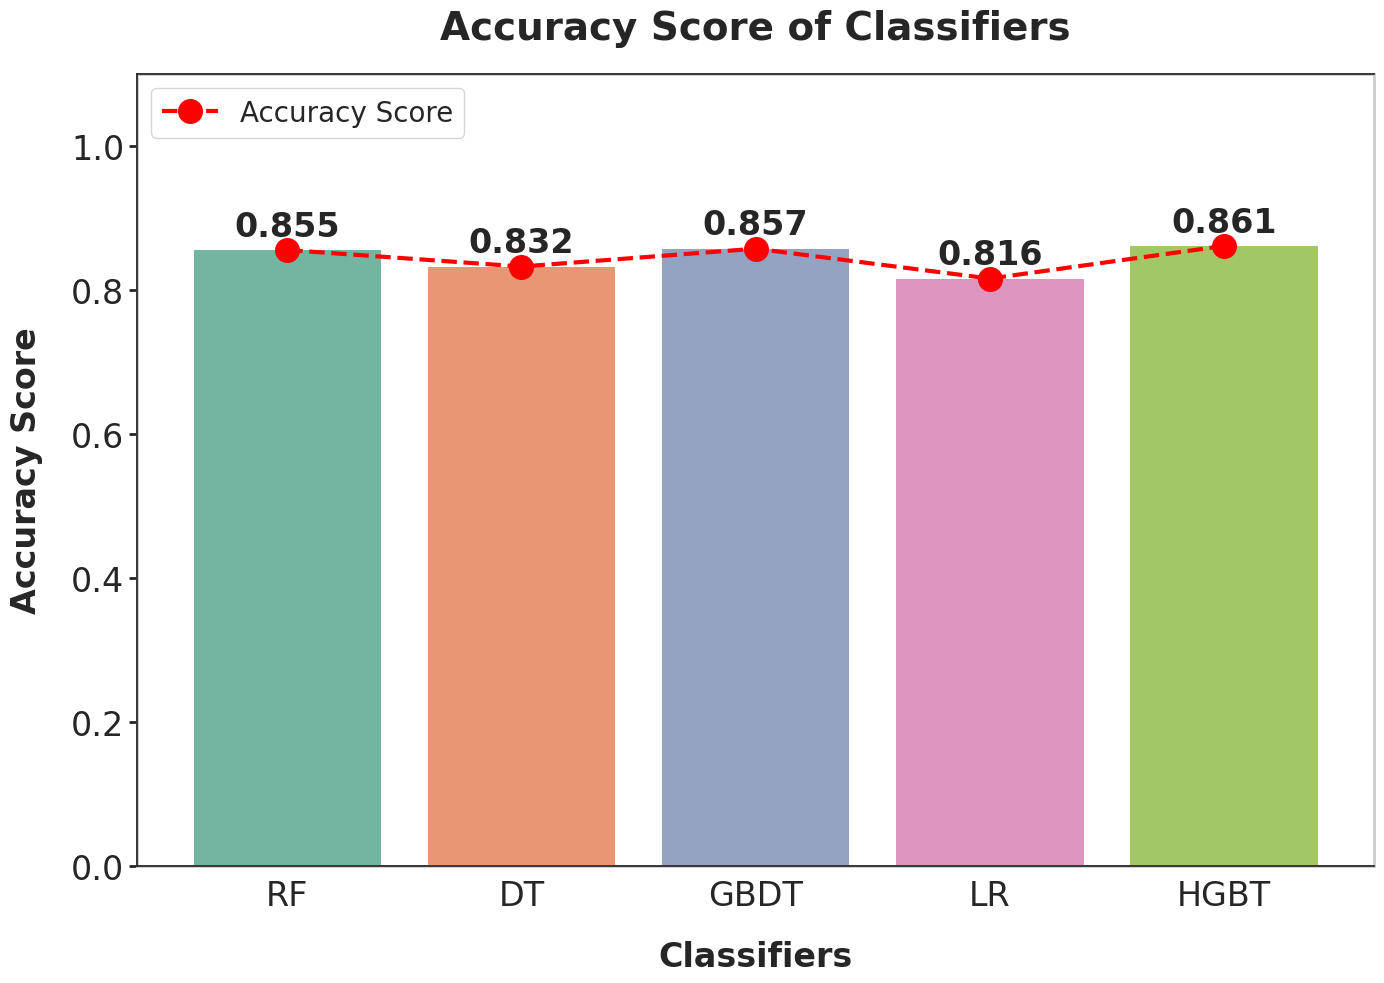

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# 数据准备
data = {
    'accuracy_score': [0.8553, 0.8323, 0.8571, 0.8156, 0.8610],
    'recall_score': [0.8553, 0.8323, 0.8571, 0.8156, 0.8610],
    'precision_score': [0.8431, 0.8178, 0.8486, 0.7835, 0.8502],
    'f1_score': [0.8429, 0.8249, 0.8511, 0.7755, 0.8488],
    'roc_auc_score': [0.8626, 0.8217, 0.8663, 0.7729, 0.8694],
}
df = pd.DataFrame(data)

# 设置画布
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 10))

# 禁用网格线
ax.grid(False)
sns.set(style="white")

# 标题和标签设置
plt.title('Accuracy Score of Classifiers', fontsize=28, pad=25, fontweight='bold')
plt.xlabel('Classifiers', fontsize=24, labelpad=20, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=24, labelpad=20, fontweight='bold')

# 设置X轴类别
classifiers = ["RF", "DT", "GBDT", "LR", "HGBT"]

# 设置柱状图
colors = sns.color_palette("Set2")
sns.barplot(
    x=classifiers,
    y=df['accuracy_score'],
    palette=colors,
    ax=ax,
    edgecolor="none"
)

# 添加折线图
ax2 = ax.twinx()
ax2.plot(
    classifiers,
    df['accuracy_score'],
    color='red',
    marker='o',
    linestyle='--',
    linewidth=3.0,
    markersize=17,
    label='Accuracy Score'
)

# 在柱子上方显示得分
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01,
        f"{height:.3f}",
        ha="center", 
        va="bottom",
        fontsize=24,
        fontweight='bold'
    )

# 调整Y轴范围
ax.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)

# 坐标轴文字设置
ax.tick_params(axis='x', labelsize=24, width=2.0)
ax.tick_params(axis='y', labelsize=24, width=2.0)

# 完全移除右侧坐标轴
ax2.spines['right'].set_visible(False)
ax2.tick_params(axis='y', which='both', length=0)
ax2.set_yticklabels([])

# 加粗轴线
for spine in ax.spines.values():
    spine.set_linewidth(2.0)

# 图例设置
ax2.legend(loc='upper left', fontsize=20)

# 调整布局
plt.tight_layout()

# 创建保存目录（如果不存在）
output_dir = "classifier_plots"
os.makedirs(output_dir, exist_ok=True)

# 保存图片到本地
filename = os.path.join(output_dir, "accuracy_score_plot.png")
plt.savefig(filename, dpi=300, bbox_inches='tight')
print(f"图片已保存至: {os.path.abspath(filename)}")

# 显示图形（可选）
plt.show()

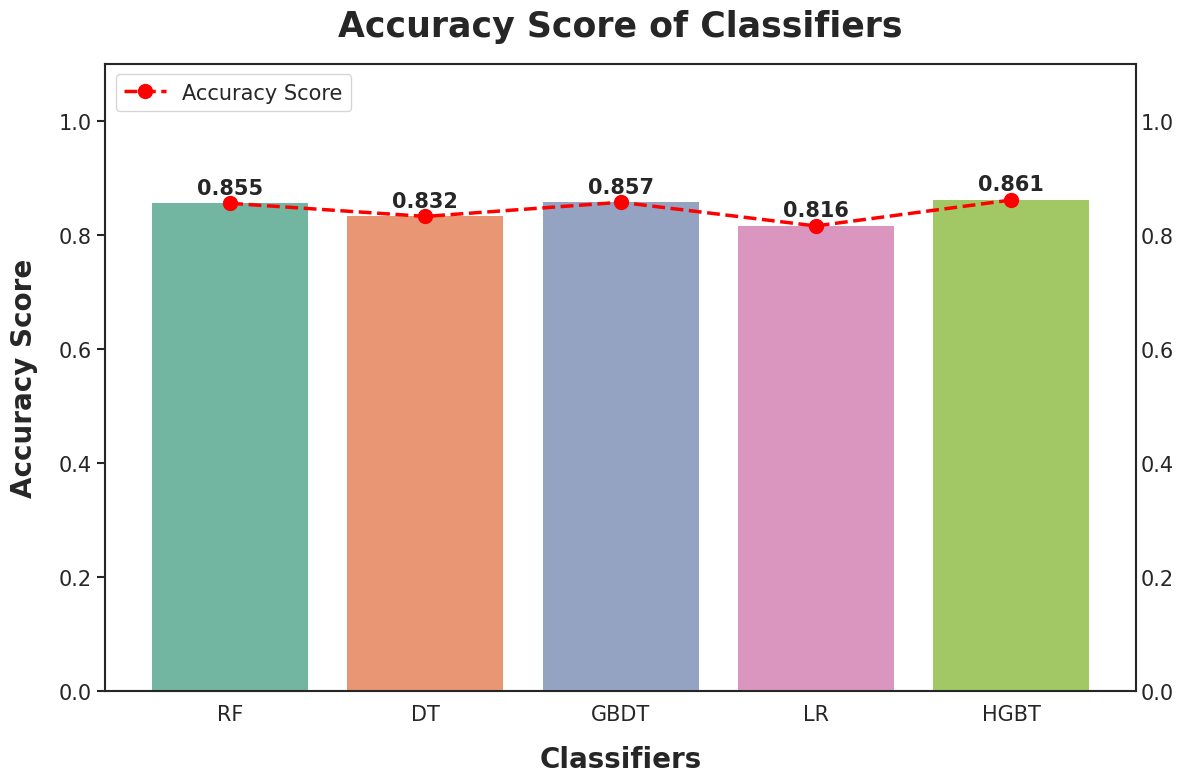

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 数据准备
data = {
    'accuracy_score': [0.8553, 0.8323, 0.8571, 0.8156, 0.8610],
    'recall_score': [0.8553, 0.8323, 0.8571, 0.8156, 0.8610],
    'precision_score': [0.8431, 0.8178, 0.8486, 0.7835, 0.8502],
    'f1_score': [0.8429, 0.8249, 0.8511, 0.7755, 0.8488],
    'roc_auc_score': [0.8626, 0.8217, 0.8663, 0.7729, 0.8694],
}
df = pd.DataFrame(data)

# 设置画布
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# 禁用网格线
ax.grid(False)
sns.set(style="white")

# 标题和标签设置
plt.title('Accuracy Score of Classifiers', fontsize=25, pad=20, fontweight='bold')
plt.xlabel('Classifiers', fontsize=20, labelpad=15, fontweight='bold')
plt.ylabel('Accuracy Score', fontsize=20, labelpad=15, fontweight='bold')

# 设置X轴类别
classifiers = ["RF", "DT", "GBDT", "LR", "HGBT"]

# 设置柱状图，去掉中间的白色线条
colors = sns.color_palette("Set2")
sns.barplot(
    x=classifiers,
    y=df['accuracy_score'],
    palette=colors,
    ax=ax,
    edgecolor="none"  # 去掉柱状图中间的白色线条
)

# 添加折线图，颜色改为红色
ax2 = ax.twinx()
ax2.plot(
    classifiers,
    df['accuracy_score'],
    color='red',  # 恢复为红色
    marker='o',
    linestyle='--',
    linewidth=2.5,
    markersize=10,
    label='Accuracy Score'
)

# 在柱子上方显示得分，字体加粗且位置更明显
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01,
        f"{height:.3f}",
        ha="center", 
        va="bottom",
        fontsize=15,
        fontweight='bold'
    )

# 调整Y轴范围和刻度
ax.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)

# 坐标轴文字加粗
ax.tick_params(axis='x', labelsize=15, width=1.5)
ax.tick_params(axis='y', labelsize=15, width=1.5)
ax2.tick_params(axis='y', labelsize=15, width=1.5, right=False, length=0)  # 去掉右侧的刻度线和标签

# 加粗轴线
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)

# 图例设置
ax2.legend(loc='upper left', fontsize=15)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# 创建保存图片的目录（如果不存在）
output_dir = "classifier_metrics_plots"
os.makedirs(output_dir, exist_ok=True)

# 数据准备
data = {
    'accuracy_score': [0.8553, 0.8323, 0.8571, 0.8156, 0.8610],
    'recall_score': [0.8553, 0.8323, 0.8571, 0.8156, 0.8610],
    'precision_score': [0.8431, 0.8178, 0.8486, 0.7835, 0.8502],
    'f1_score': [0.8429, 0.8249, 0.8511, 0.7755, 0.8488],
    'roc_auc_score': [0.8626, 0.8217, 0.8663, 0.7729, 0.8694],
}
df = pd.DataFrame(data)
classifiers = ["RF", "DT", "GBDT", "LR", "HGBT"]

# 创建所有指标的图表
metrics = ['recall_score', 'precision_score', 'f1_score', 'roc_auc_score']
metric_names = {
    'recall_score': 'Recall Score',
    'precision_score': 'Precision Score',
    'f1_score': 'F1 Score',
    'roc_auc_score': 'ROC AUC Score'
}

for metric in metrics:
    # 设置画布
    sns.set(style="whitegrid")
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # 禁用网格线
    ax.grid(False)
    sns.set(style="white")
    
    # 标题和标签设置
    plt.title(f'{metric_names[metric]} of Classifiers', fontsize=28, pad=25, fontweight='bold')
    plt.xlabel('Classifiers', fontsize=24, labelpad=20, fontweight='bold')
    plt.ylabel(metric_names[metric], fontsize=24, labelpad=20, fontweight='bold')
    
    # 设置柱状图
    colors = sns.color_palette("Set2")
    sns.barplot(
        x=classifiers,
        y=df[metric],
        palette=colors,
        ax=ax,
        edgecolor="none"
    )
    
    # 添加折线图
    ax2 = ax.twinx()
    ax2.plot(
        classifiers,
        df[metric],
        color='red',
        marker='o',
        linestyle='--',
        linewidth=3.0,
        markersize=17,
        label=metric_names[metric]
    )
    
    # 在柱子上方显示得分
    for i, p in enumerate(ax.patches):
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 0.01,
            f"{height:.3f}",
            ha="center", 
            va="bottom",
            fontsize=24,
            fontweight='bold'
        )
    
    # 调整Y轴范围
    ax.set_ylim(0, 1.1)
    ax2.set_ylim(0, 1.1)
    
    # 坐标轴文字设置
    ax.tick_params(axis='x', labelsize=24, width=2.0)
    ax.tick_params(axis='y', labelsize=24, width=2.0)
    
    # 完全移除右侧坐标轴
    ax2.spines['right'].set_visible(False)
    ax2.tick_params(axis='y', which='both', length=0)
    ax2.set_yticklabels([])
    
    # 加粗轴线
    for spine in ax.spines.values():
        spine.set_linewidth(2.0)
    
    # 图例设置
    ax2.legend(loc='upper left', fontsize=20)
    
    # 调整布局
    plt.tight_layout()
    
    # 保存图片到本地
    filename = f"{output_dir}/{metric}_plot.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"已保存: {filename}")
    
    # 关闭图形以释放内存
    plt.close()

print(f"\n所有图片已保存至目录: {os.path.abspath(output_dir)}")

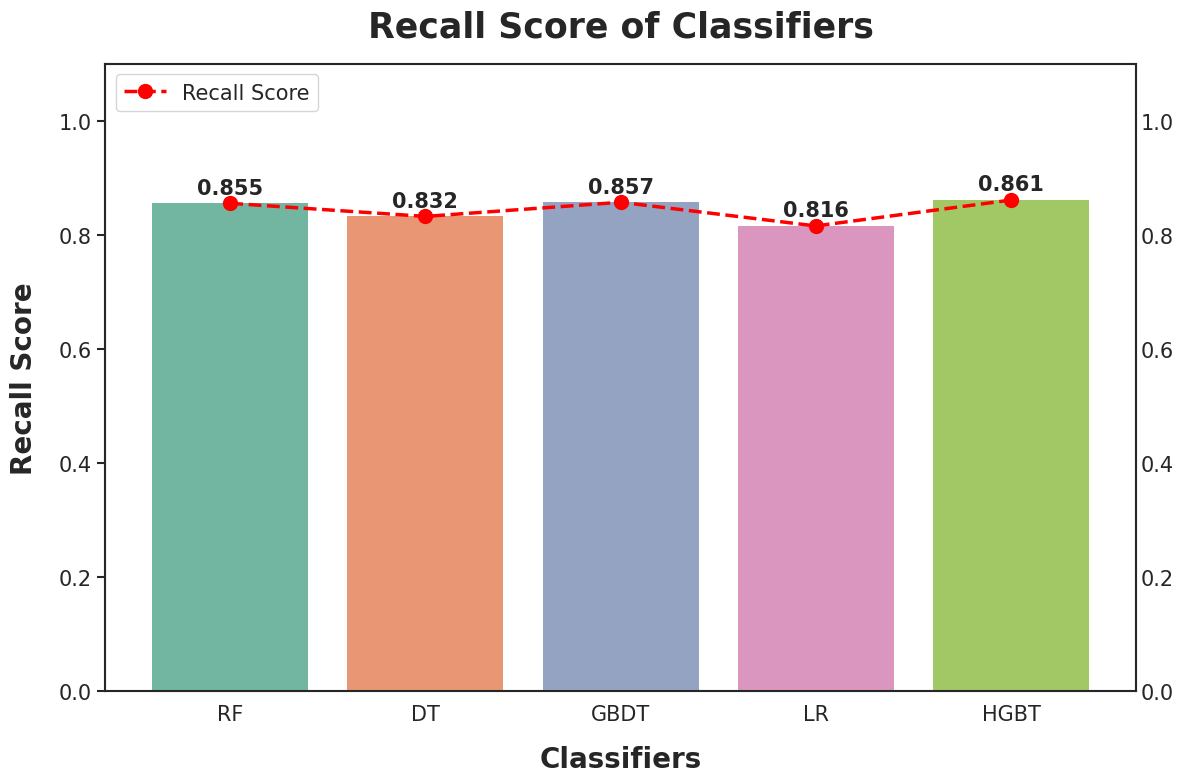

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 数据准备
data = {
    'accuracy_score': [0.8553, 0.8323, 0.8571, 0.8156, 0.8610],
    'recall_score': [0.8553, 0.8323, 0.8571, 0.8156, 0.8610], # 使用 recall_score
    'precision_score': [0.8431, 0.8178, 0.8486, 0.7835, 0.8502],
    'f1_score': [0.8429, 0.8249, 0.8511, 0.7755, 0.8488],
    'roc_auc_score': [0.8626, 0.8217, 0.8663, 0.7729, 0.8694],
}
df = pd.DataFrame(data)

# 设置画布
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# 禁用网格线
ax.grid(False)
sns.set(style="white")

# 标题和标签设置 (更新标题和ylabel)
plt.title('Recall Score of Classifiers', fontsize=25, pad=20, fontweight='bold')
plt.xlabel('Classifiers', fontsize=20, labelpad=15, fontweight='bold')
plt.ylabel('Recall Score', fontsize=20, labelpad=15, fontweight='bold') # 更新 ylabel

# 设置X轴类别
classifiers = ["RF", "DT", "GBDT", "LR", "HGBT"]

# 设置柱状图，去掉中间的白色线条 (使用 recall_score)
colors = sns.color_palette("Set2")
sns.barplot(
    x=classifiers,
    y=df['recall_score'], # 使用 recall_score
    palette=colors,
    ax=ax,
    edgecolor="none"
)

# 添加折线图，颜色改为红色 (使用 recall_score 并更新 legend label)
ax2 = ax.twinx()
ax2.plot(
    classifiers,
    df['recall_score'], # 使用 recall_score
    color='red',
    marker='o',
    linestyle='--',
    linewidth=2.5,
    markersize=10,
    label='Recall Score' # 更新 label
)

# 在柱子上方显示得分，字体加粗且位置更明显
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01,
        f"{height:.3f}",
        ha="center",
        va="bottom",
        fontsize=15,
        fontweight='bold'
    )

# 调整Y轴范围和刻度
ax.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)

# 坐标轴文字加粗
ax.tick_params(axis='x', labelsize=15, width=1.5)
ax.tick_params(axis='y', labelsize=15, width=1.5)
ax2.tick_params(axis='y', labelsize=15, width=1.5, right=False, length=0) # 去掉右侧的刻度线和标签

# 加粗轴线
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)

# 图例设置 (更新 legend label)
ax2.legend(loc='upper left', fontsize=15)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


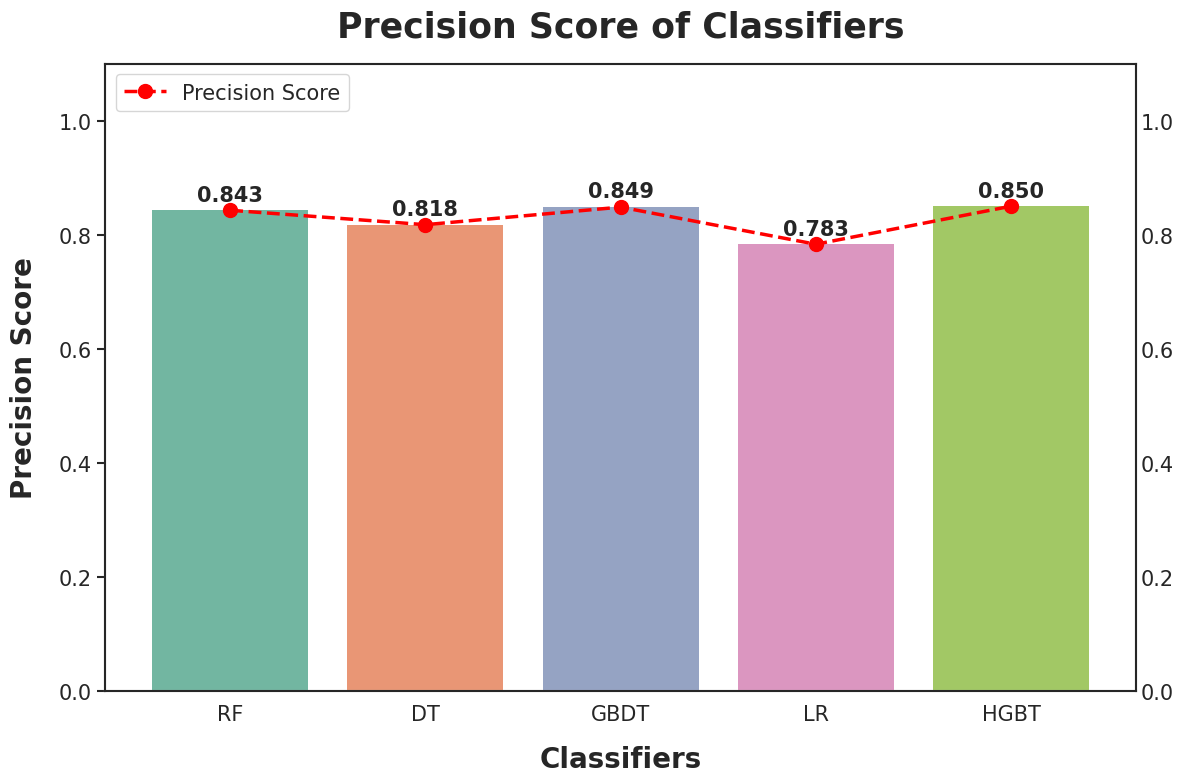

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 数据准备
data = {
    'accuracy_score': [0.8553, 0.8323, 0.8571, 0.8156, 0.8610],
    'recall_score': [0.8553, 0.8323, 0.8571, 0.8156, 0.8610],
    'precision_score': [0.8431, 0.8178, 0.8486, 0.7835, 0.8502], # 使用 precision_score
    'f1_score': [0.8429, 0.8249, 0.8511, 0.7755, 0.8488],
    'roc_auc_score': [0.8626, 0.8217, 0.8663, 0.7729, 0.8694],
}
df = pd.DataFrame(data)

# 设置画布
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# 禁用网格线
ax.grid(False)
sns.set(style="white")

# 标题和标签设置 (更新标题和ylabel)
plt.title('Precision Score of Classifiers', fontsize=25, pad=20, fontweight='bold')
plt.xlabel('Classifiers', fontsize=20, labelpad=15, fontweight='bold')
plt.ylabel('Precision Score', fontsize=20, labelpad=15, fontweight='bold') # 更新 ylabel

# 设置X轴类别
classifiers = ["RF", "DT", "GBDT", "LR", "HGBT"]

# 设置柱状图，去掉中间的白色线条 (使用 precision_score)
colors = sns.color_palette("Set2")
sns.barplot(
    x=classifiers,
    y=df['precision_score'], # 使用 precision_score
    palette=colors,
    ax=ax,
    edgecolor="none"
)

# 添加折线图，颜色改为红色 (使用 precision_score 并更新 legend label)
ax2 = ax.twinx()
ax2.plot(
    classifiers,
    df['precision_score'], # 使用 precision_score
    color='red',
    marker='o',
    linestyle='--',
    linewidth=2.5,
    markersize=10,
    label='Precision Score' # 更新 label
)

# 在柱子上方显示得分，字体加粗且位置更明显
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01,
        f"{height:.3f}",
        ha="center",
        va="bottom",
        fontsize=15,
        fontweight='bold'
    )

# 调整Y轴范围和刻度
ax.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)

# 坐标轴文字加粗
ax.tick_params(axis='x', labelsize=15, width=1.5)
ax.tick_params(axis='y', labelsize=15, width=1.5)
ax2.tick_params(axis='y', labelsize=15, width=1.5, right=False, length=0) # 去掉右侧的刻度线和标签

# 加粗轴线
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)

# 图例设置 (更新 legend label)
ax2.legend(loc='upper left', fontsize=15)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


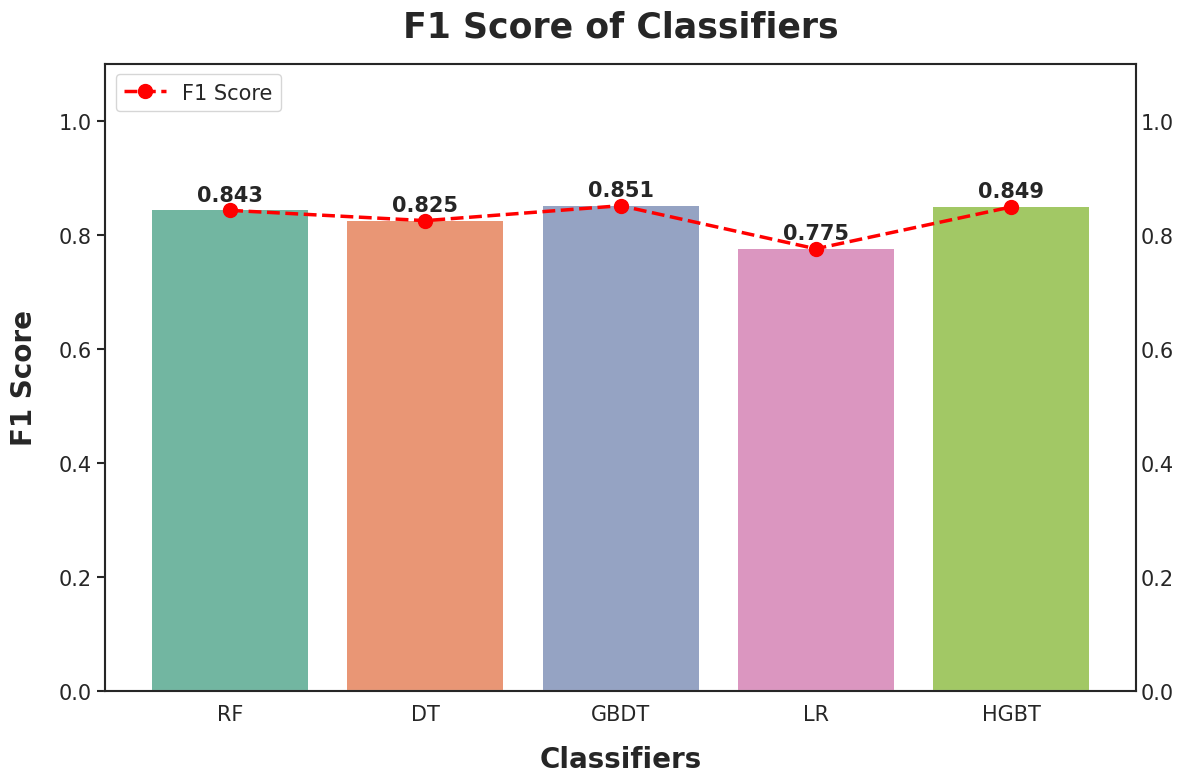

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 数据准备
data = {
    'accuracy_score': [0.8553, 0.8323, 0.8571, 0.8156, 0.8610],
    'recall_score': [0.8553, 0.8323, 0.8571, 0.8156, 0.8610],
    'precision_score': [0.8431, 0.8178, 0.8486, 0.7835, 0.8502],
    'f1_score': [0.8429, 0.8249, 0.8511, 0.7755, 0.8488], # 使用 f1_score
    'roc_auc_score': [0.8626, 0.8217, 0.8663, 0.7729, 0.8694],
}
df = pd.DataFrame(data)

# 设置画布
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# 禁用网格线
ax.grid(False)
sns.set(style="white")

# 标题和标签设置 (更新标题和ylabel)
plt.title('F1 Score of Classifiers', fontsize=25, pad=20, fontweight='bold')
plt.xlabel('Classifiers', fontsize=20, labelpad=15, fontweight='bold')
plt.ylabel('F1 Score', fontsize=20, labelpad=15, fontweight='bold') # 更新 ylabel

# 设置X轴类别
classifiers = ["RF", "DT", "GBDT", "LR", "HGBT"]

# 设置柱状图，去掉中间的白色线条 (使用 f1_score)
colors = sns.color_palette("Set2")
sns.barplot(
    x=classifiers,
    y=df['f1_score'], # 使用 f1_score
    palette=colors,
    ax=ax,
    edgecolor="none"
)

# 添加折线图，颜色改为红色 (使用 f1_score 并更新 legend label)
ax2 = ax.twinx()
ax2.plot(
    classifiers,
    df['f1_score'], # 使用 f1_score
    color='red',
    marker='o',
    linestyle='--',
    linewidth=2.5,
    markersize=10,
    label='F1 Score' # 更新 label
)

# 在柱子上方显示得分，字体加粗且位置更明显
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01,
        f"{height:.3f}",
        ha="center",
        va="bottom",
        fontsize=15,
        fontweight='bold'
    )

# 调整Y轴范围和刻度
ax.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)

# 坐标轴文字加粗
ax.tick_params(axis='x', labelsize=15, width=1.5)
ax.tick_params(axis='y', labelsize=15, width=1.5)
ax2.tick_params(axis='y', labelsize=15, width=1.5, right=False, length=0) # 去掉右侧的刻度线和标签

# 加粗轴线
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)

# 图例设置 (更新 legend label)
ax2.legend(loc='upper left', fontsize=15)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


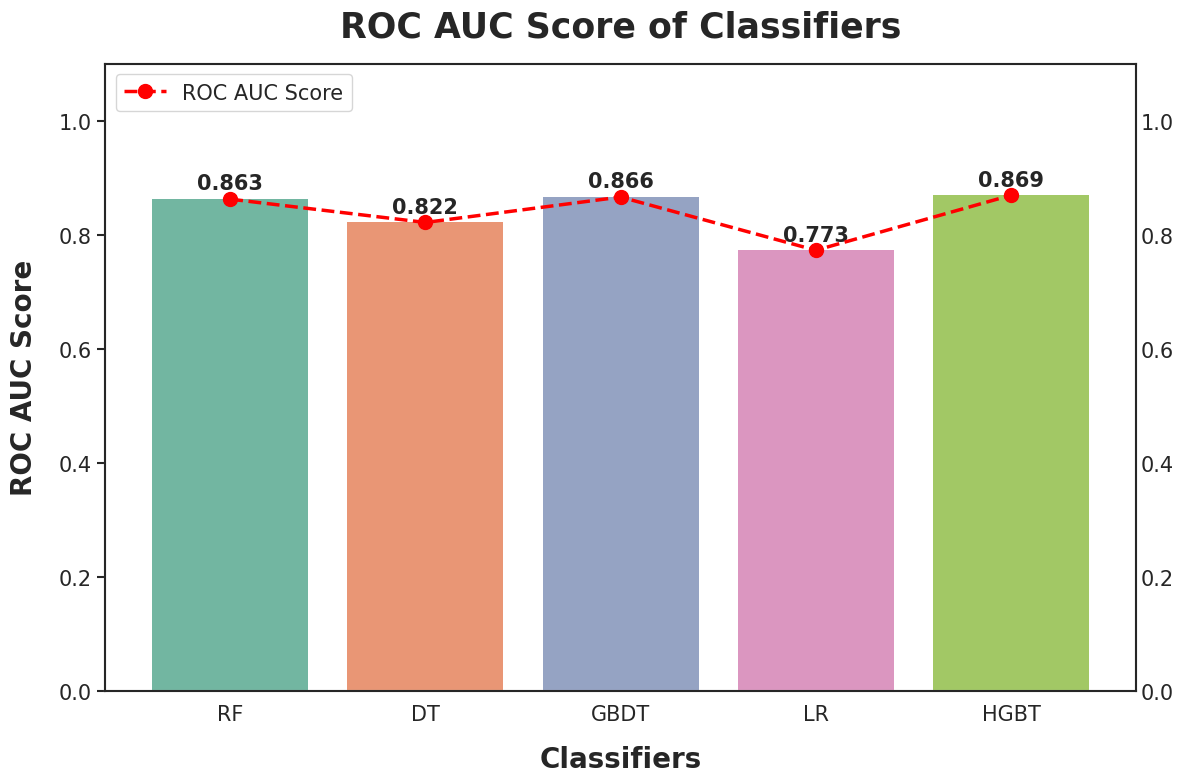

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 数据准备
data = {
    'accuracy_score': [0.8553, 0.8323, 0.8571, 0.8156, 0.8610],
    'recall_score': [0.8553, 0.8323, 0.8571, 0.8156, 0.8610],
    'precision_score': [0.8431, 0.8178, 0.8486, 0.7835, 0.8502],
    'f1_score': [0.8429, 0.8249, 0.8511, 0.7755, 0.8488],
    'roc_auc_score': [0.8626, 0.8217, 0.8663, 0.7729, 0.8694], # 使用 roc_auc_score
}
df = pd.DataFrame(data)

# 设置画布
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

# 禁用网格线
ax.grid(False)
sns.set(style="white")

# 标题和标签设置 (更新标题和ylabel)
plt.title('ROC AUC Score of Classifiers', fontsize=25, pad=20, fontweight='bold')
plt.xlabel('Classifiers', fontsize=20, labelpad=15, fontweight='bold')
plt.ylabel('ROC AUC Score', fontsize=20, labelpad=15, fontweight='bold') # 更新 ylabel

# 设置X轴类别
classifiers = ["RF", "DT", "GBDT", "LR", "HGBT"]

# 设置柱状图，去掉中间的白色线条 (使用 roc_auc_score)
colors = sns.color_palette("Set2")
sns.barplot(
    x=classifiers,
    y=df['roc_auc_score'], # 使用 roc_auc_score
    palette=colors,
    ax=ax,
    edgecolor="none"
)

# 添加折线图，颜色改为红色 (使用 roc_auc_score 并更新 legend label)
ax2 = ax.twinx()
ax2.plot(
    classifiers,
    df['roc_auc_score'], # 使用 roc_auc_score
    color='red',
    marker='o',
    linestyle='--',
    linewidth=2.5,
    markersize=10,
    label='ROC AUC Score' # 更新 label
)

# 在柱子上方显示得分，字体加粗且位置更明显
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.01,
        f"{height:.3f}",
        ha="center",
        va="bottom",
        fontsize=15,
        fontweight='bold'
    )

# 调整Y轴范围和刻度
ax.set_ylim(0, 1.1)
ax2.set_ylim(0, 1.1)

# 坐标轴文字加粗
ax.tick_params(axis='x', labelsize=15, width=1.5)
ax.tick_params(axis='y', labelsize=15, width=1.5)
ax2.tick_params(axis='y', labelsize=15, width=1.5, right=False, length=0) # 去掉右侧的刻度线和标签

# 加粗轴线
for spine in ax.spines.values():
    spine.set_linewidth(1.5)
for spine in ax2.spines.values():
    spine.set_linewidth(1.5)

# 图例设置 (更新 legend label)
ax2.legend(loc='upper left', fontsize=15)

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()


In [124]:
import numpy as np
from scipy.stats import wasserstein_distance

dist_wasserstein = wasserstein_distance(y_test_fen, predictions)

print(f"Wasserstein Distance: {dist_wasserstein}")

Wasserstein Distance: 0.19557977596124732


In [ ]:
import matplotlib.pyplot as plt

# 导入scipy库
from scipy.stats import gaussian_kde

# 计算两组数据的密度估计
obs_density = gaussian_kde(y_test_fen)
pred_density = gaussian_kde(predictions)

# 生成一组横坐标
x = np.linspace(min(y_test_fen - predictions), max(y_test_fen + predictions), 200)

# 绘制两个密度图
plt.plot(x, obs_density(x), label='Observations')
plt.plot(x, pred_density(x), label='Predictions')

# 添加图例和标题
plt.legend()
plt.title('Density Plot')

# 显示图形
plt.show()

In [ ]:
# ... existing code ...
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False    # 解决保存图像是负号'-'显示为方块的问题

# 假设 y_test_fen 是真实值，predictions 是模型的预测输出
# y_test_fen = ...
# predictions = ...

# 计算残差
residuals = np.array(y_test_fen) - np.array(predictions)

# 绘制残差的直方图和核密度估计(KDE)图
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30) # kde=True 添加平滑的密度曲线
plt.xlabel('Residuals (Actual - Predicted)') # 将标签更改为英文
plt.ylabel('Frequency / Density')           # 将标签更改为英文
plt.title('Residual Distribution Plot')      # 将标题更改为英文
plt.axvline(x=0, color='r', linestyle='--') # 添加 x=0 的垂直虚线
plt.show()
# ... existing code ...


In [ ]:
# 添加误差分析图：残差分布
plt.figure(figsize=(10, 6))
residuals = np.array(y_test_fen) - np.array(predictions)
plt.hist(residuals, bins=30, alpha=0.7, density=True, color='green')
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error')

# 添加残差的密度曲线
res_density = gaussian_kde(residuals)
x_res = np.linspace(min(residuals), max(residuals), 200)
plt.plot(x_res, res_density(x_res), 'k-', linewidth=2)

# 添加标签
plt.xlabel('Prediction Error (Observed - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prediction Errors', fontsize=14)
plt.legend(['Density', 'Zero Error Line'])
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('error_distribution.png', dpi=300)
plt.show()


In [ ]:
plot_confusion_matrix(y_test_fen,predictions)

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    
    # 绘制混淆矩阵
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix', fontsize=20, fontweight='bold')
    plt.colorbar()
    
    # 设置刻度
    tick_marks = np.arange(len(np.unique(y_true)))
    plt.xticks(tick_marks, np.unique(y_true), fontsize=15, fontweight='bold')
    plt.yticks(tick_marks, np.unique(y_true), fontsize=15, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=18, fontweight='bold')
    plt.ylabel('True Label', fontsize=18, fontweight='bold')

    # 在每个单元格中添加数字
    thresh = cm.max() / 2.  # 阈值，用于设置文本颜色
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 fontsize=15,
                 fontweight='bold',
                 color="white" if cm[i, j] > thresh else "black")
    
    # 添加分割线，使区域划分更明显
    ax = plt.gca()  # 获取当前的轴对象
    for i in range(1, cm.shape[0]):  # 绘制水平和垂直分割线
        ax.axhline(i - 0.5, color='black', linewidth=2)
        ax.axvline(i - 0.5, color='black', linewidth=2)

    plt.tight_layout()
    plt.show()

# 使用您自己的数据
# y_true: 实际标签
# y_pred: 模型预测值
y_true = [...]  # 替换为您的实际标签
y_pred = [...]  # 替换为您的模型预测值

plot_confusion_matrix(y_true, y_pred)


In [ ]:
plot_roc_curve(y_test_fen,y_scores)

In [ ]:
y_scores